In [62]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
Aer.backends()
backend = Aer.get_backend('statevector_simulator')

In [54]:
# from qiskit.providers.aer import StatevectorSimulator
# backend = StatevectorSimulator(device="gpu")

In [3]:
# FR = np.array([[1, 0],
#               [0, 1]])
# CR=np.array([1,1])

# # Normalize weights
# CR = CR/np.max(CR)

In [4]:
FR = np.array([[1, 1],
              [1, 1]])
CR=np.array([1,10])

# Normalize weights
CR = CR/np.max(CR)

In [5]:
# FR = np.array([[1, 0,1, 0],
#               [0, 1,1, 0],
#               [0, 0,0, 1]])
# # CR=np.array([1,1,2.125,1])
# CR=np.random.rand(4)

# # Normalize weights
# CR = CR/np.max(CR)

In [6]:
# from data.tailassignment_loader import *
# FR,CR = npy_loader(f'../data//tailassignment_samples/npy_samples/FRCR_6_24_3_1.npy')

# # Normalize weights
# CR = CR/np.max(CR)

In [7]:
# F, R  = np.shape(FR)

In [8]:
# c=cost_vector(CR,FR,1,plotsolutions=True)

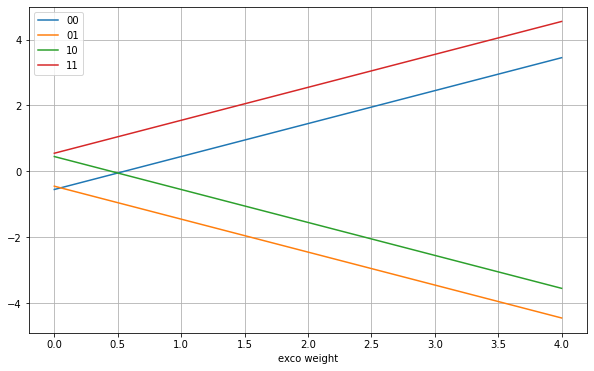

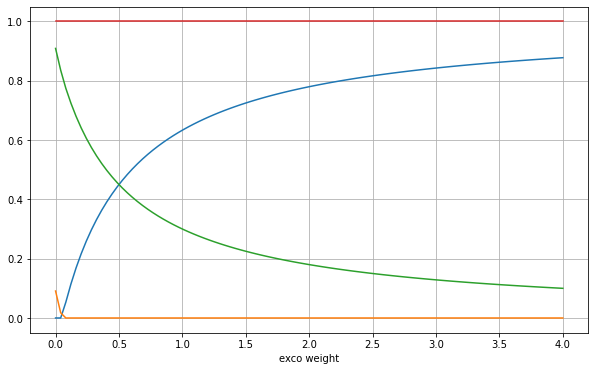

In [9]:
x, e, es, ue, lab = getSpectrum(CR, FR)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

pl.figure(figsize=(10,6))
for i in range(e.shape[0]):
    pl.plot(x,es[i,:])
pl.xlabel("exco weight")
pl.grid()

mu= 0.1
mu= 0.2
mu= 1
mu= 10


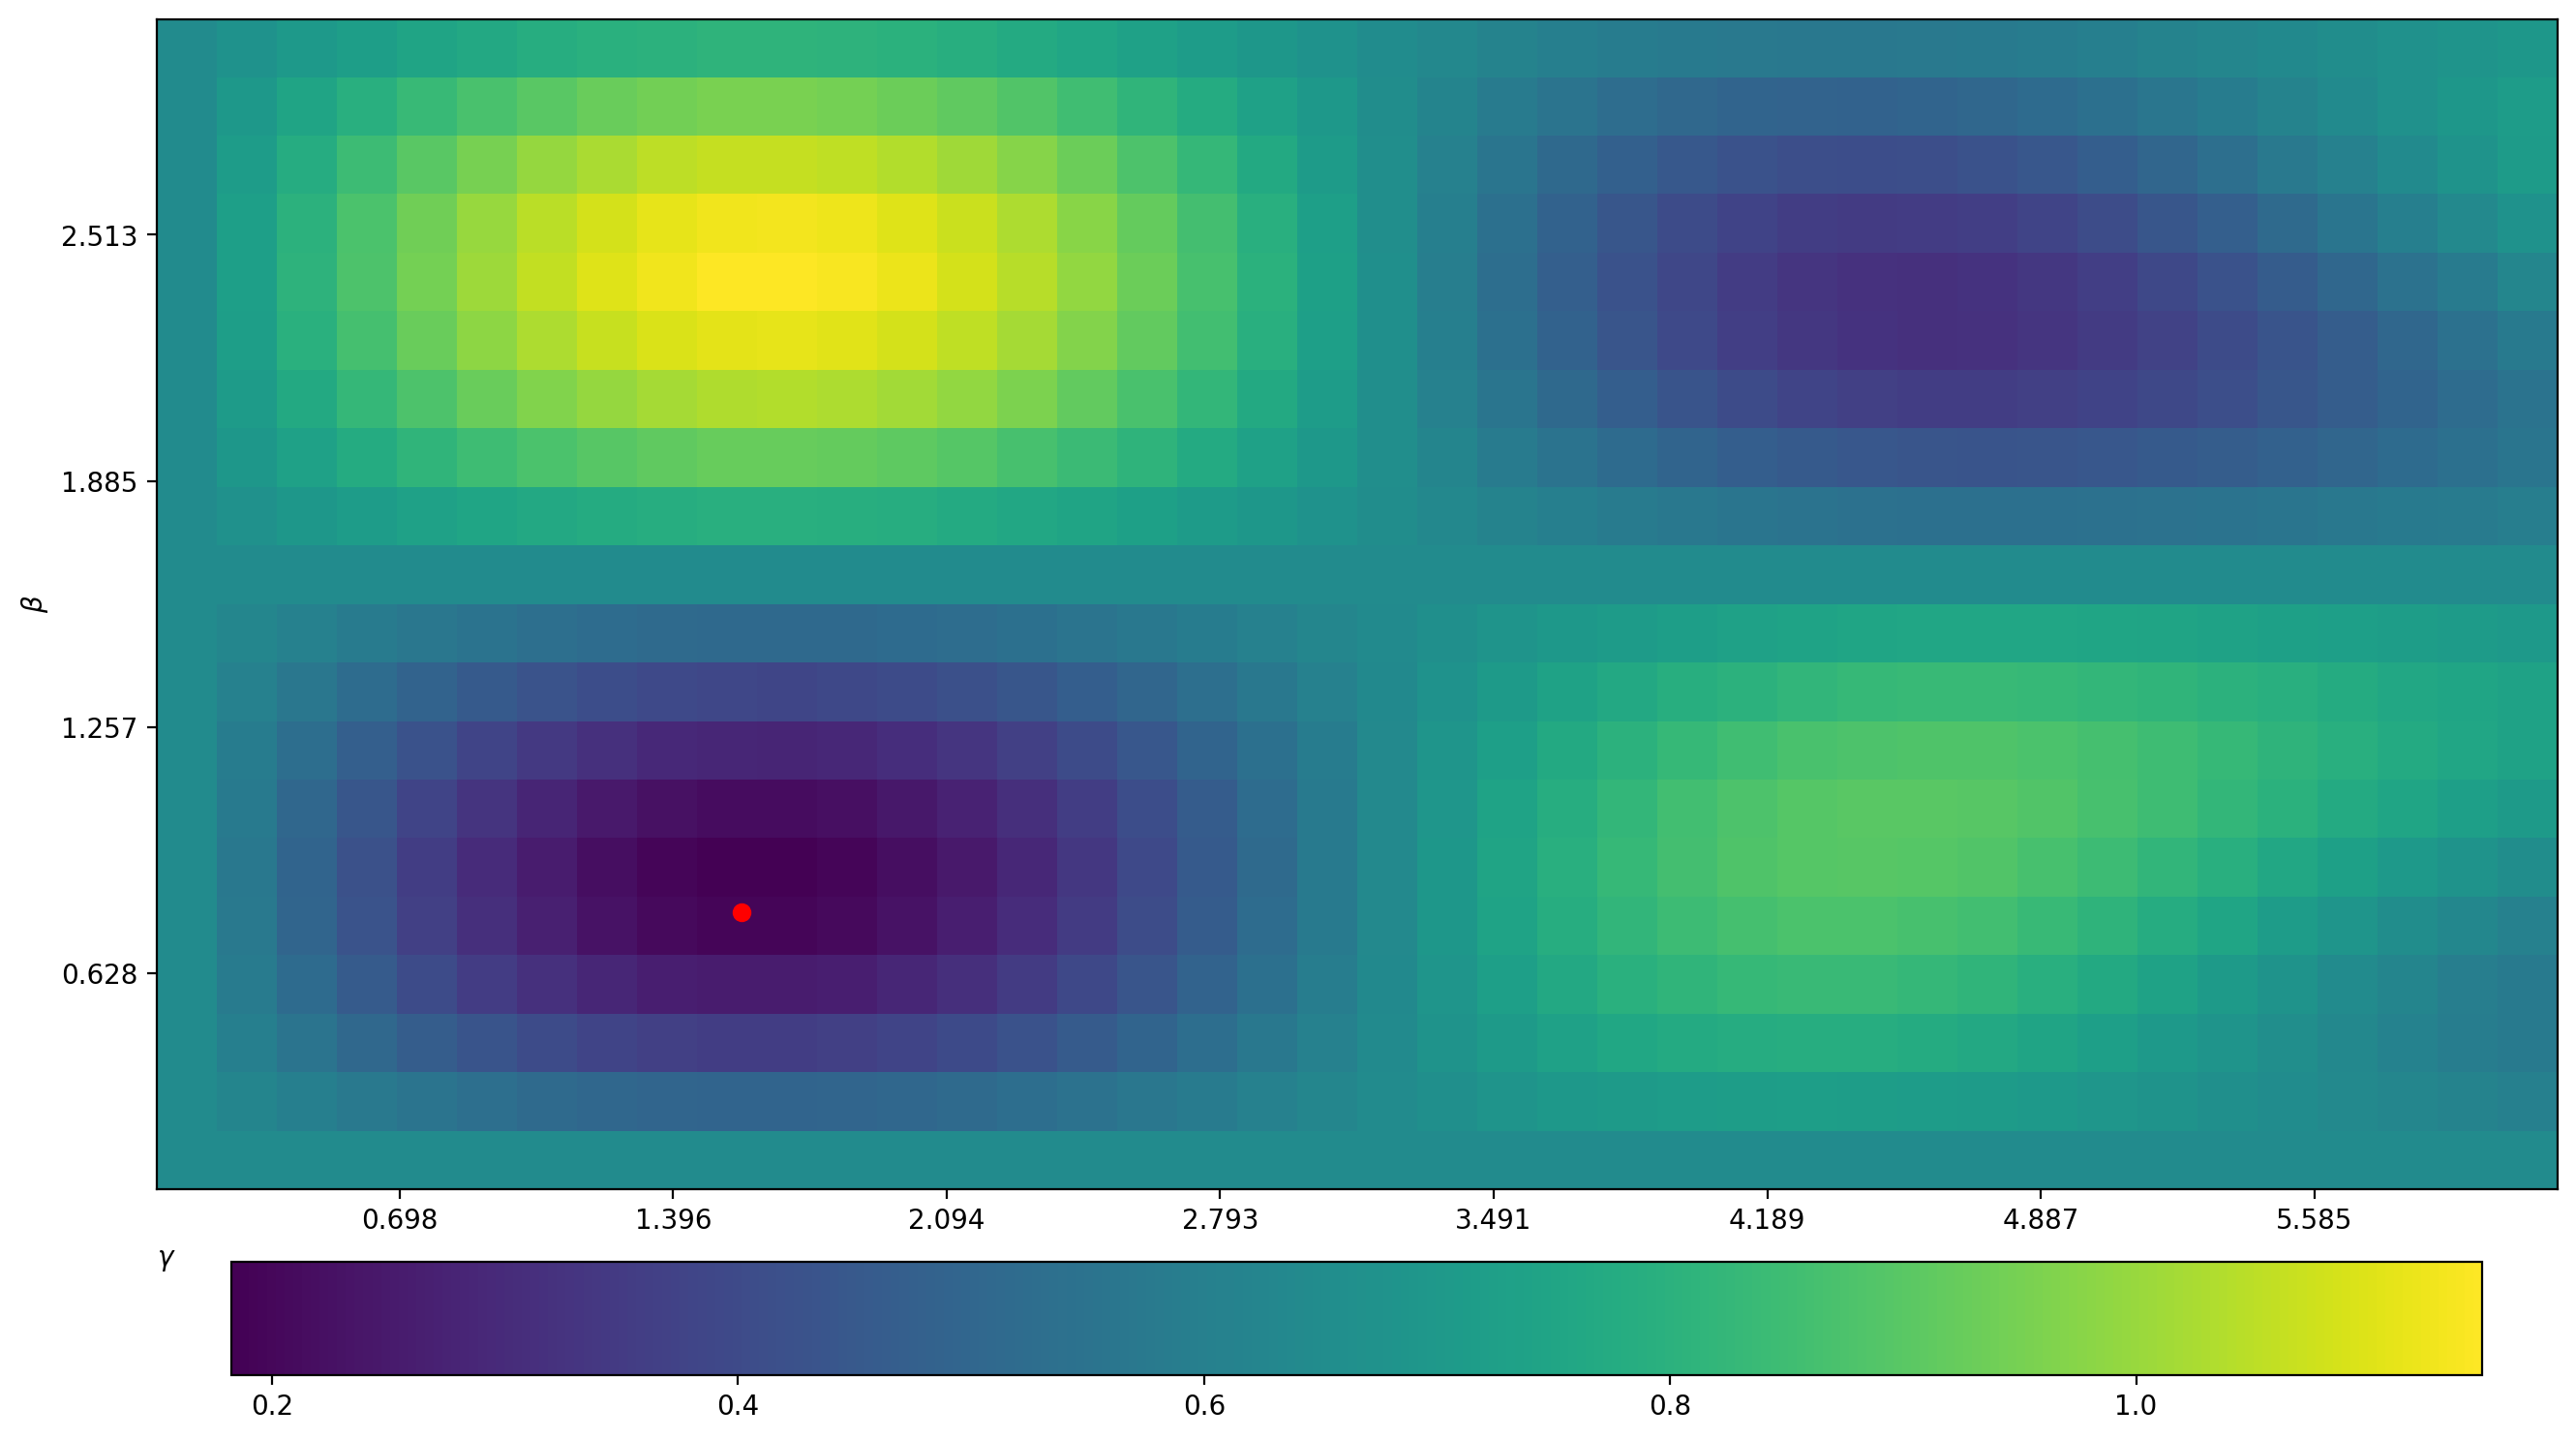

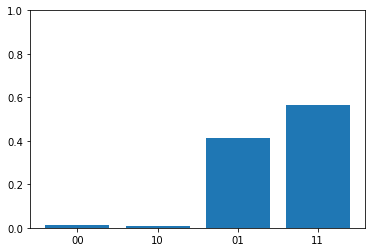

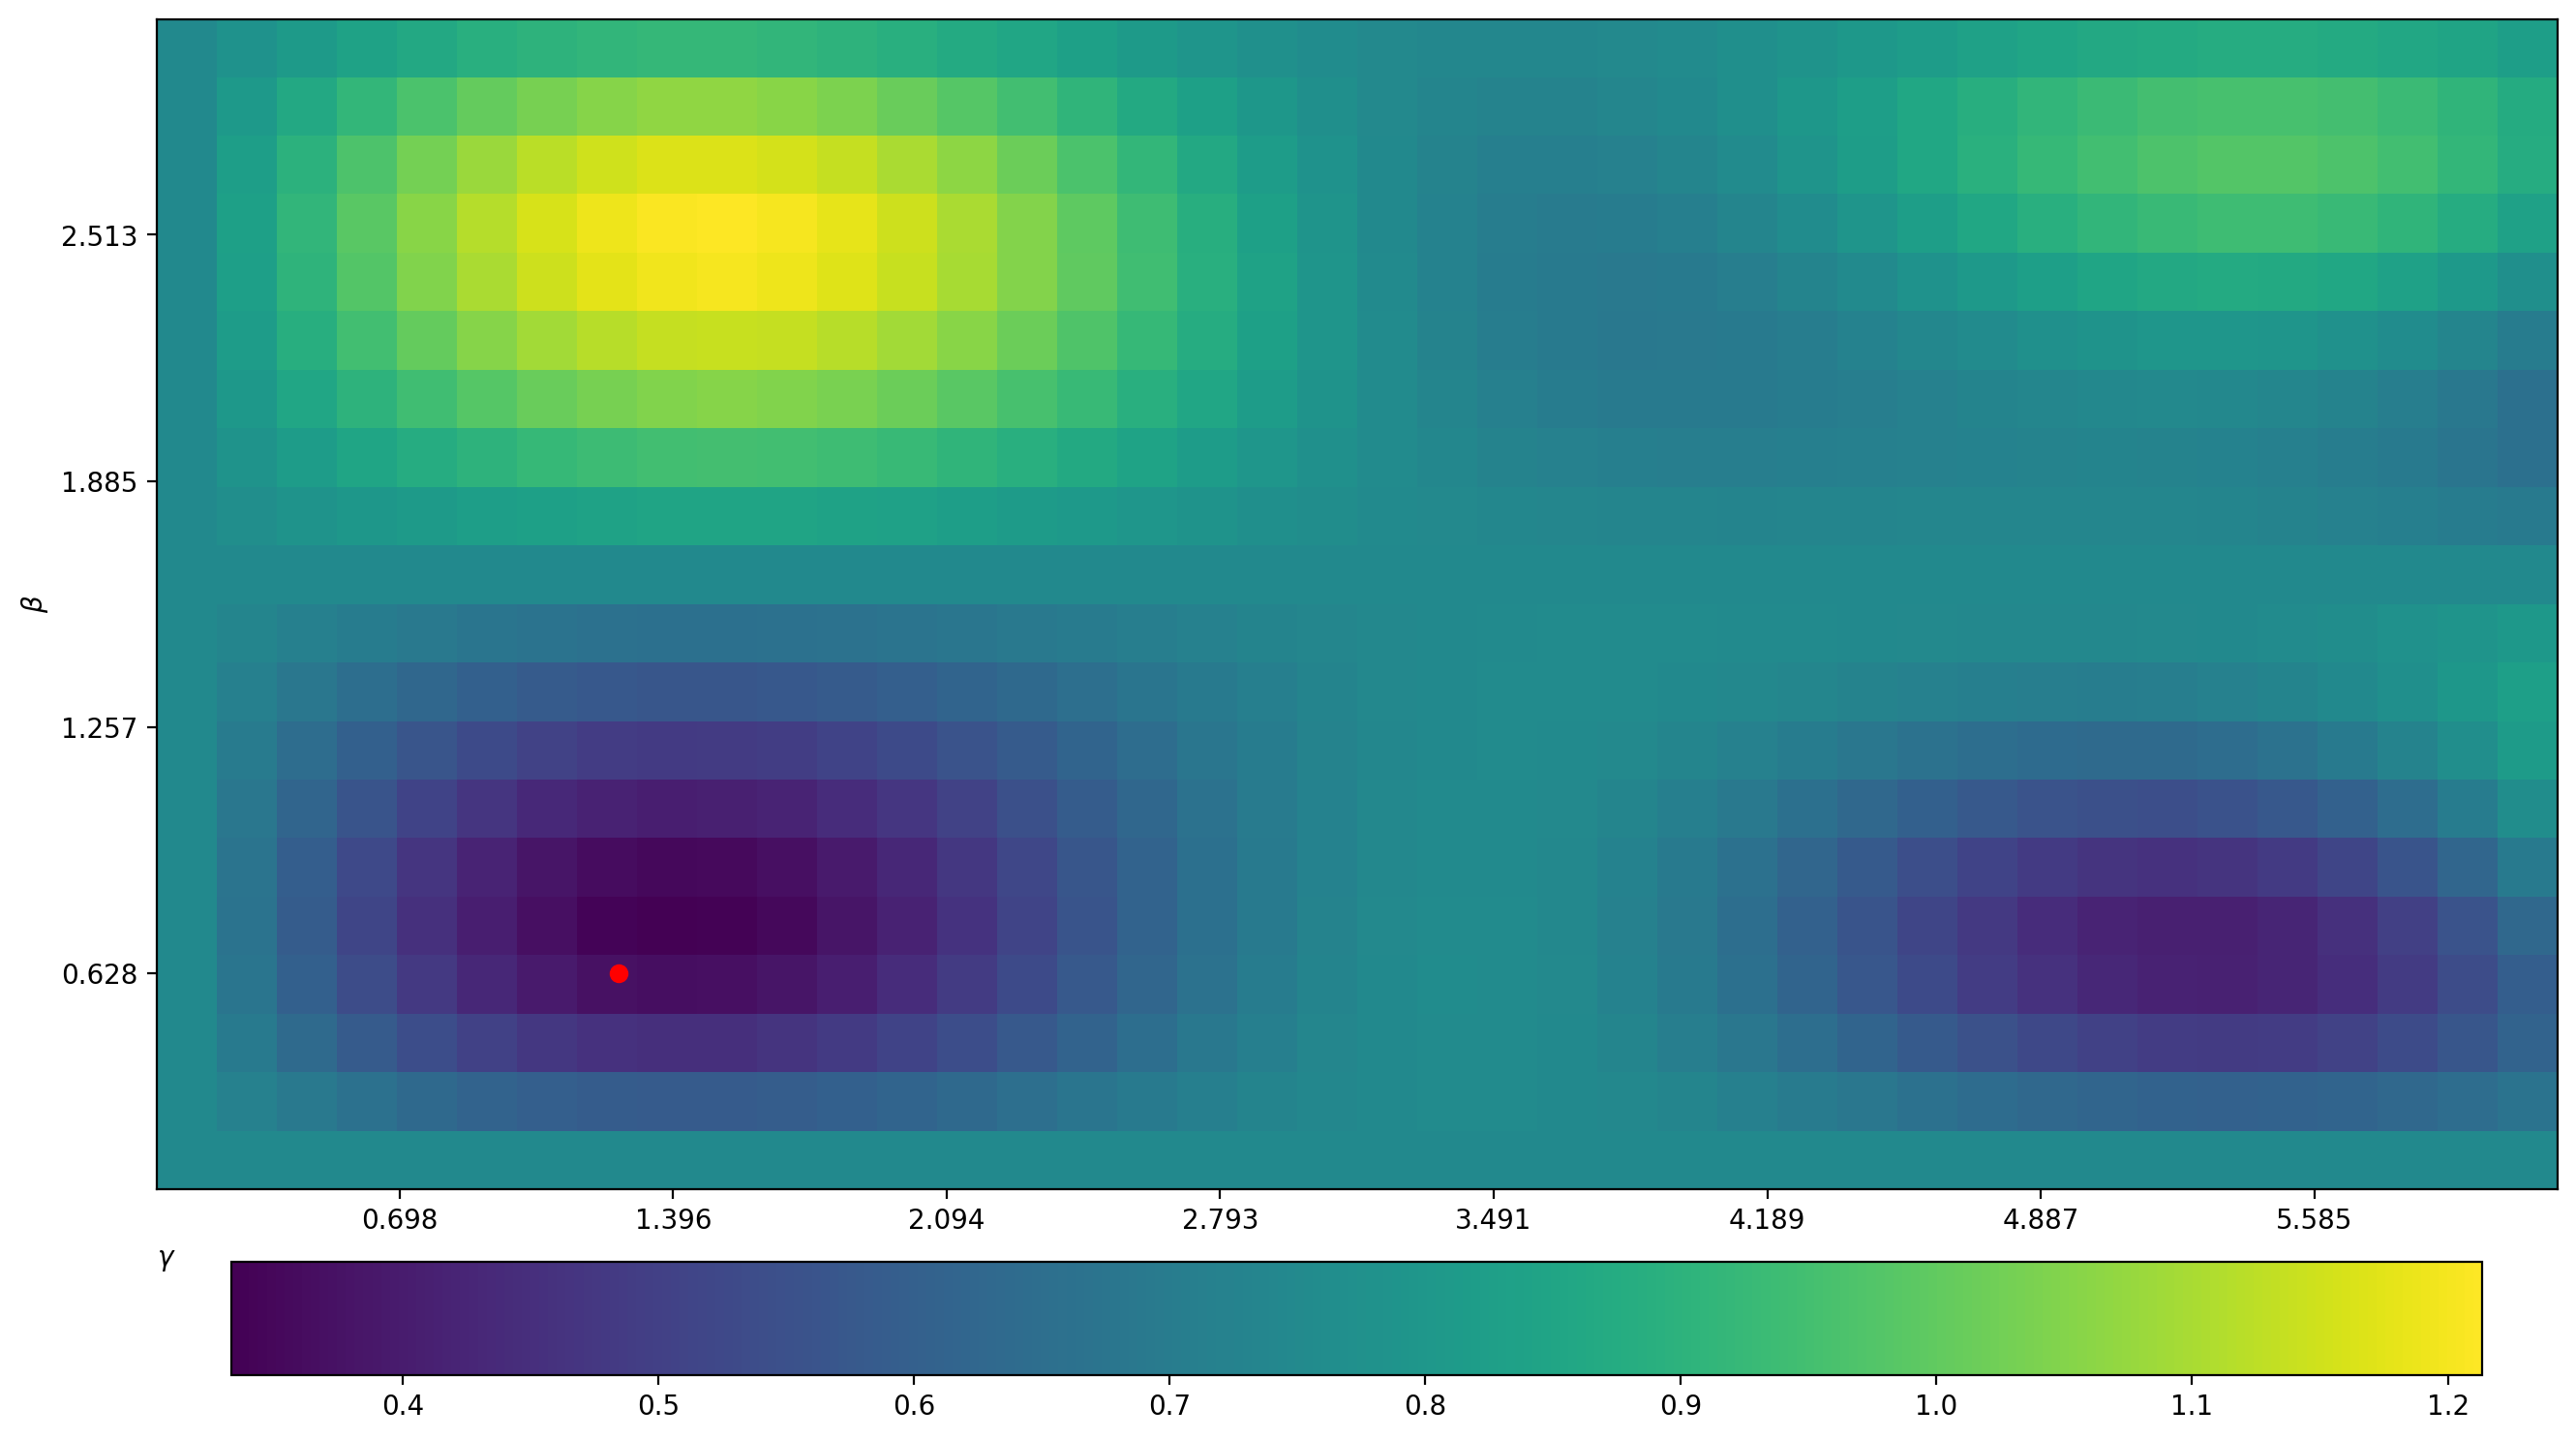

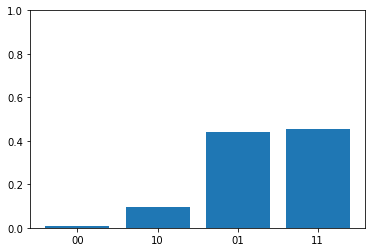

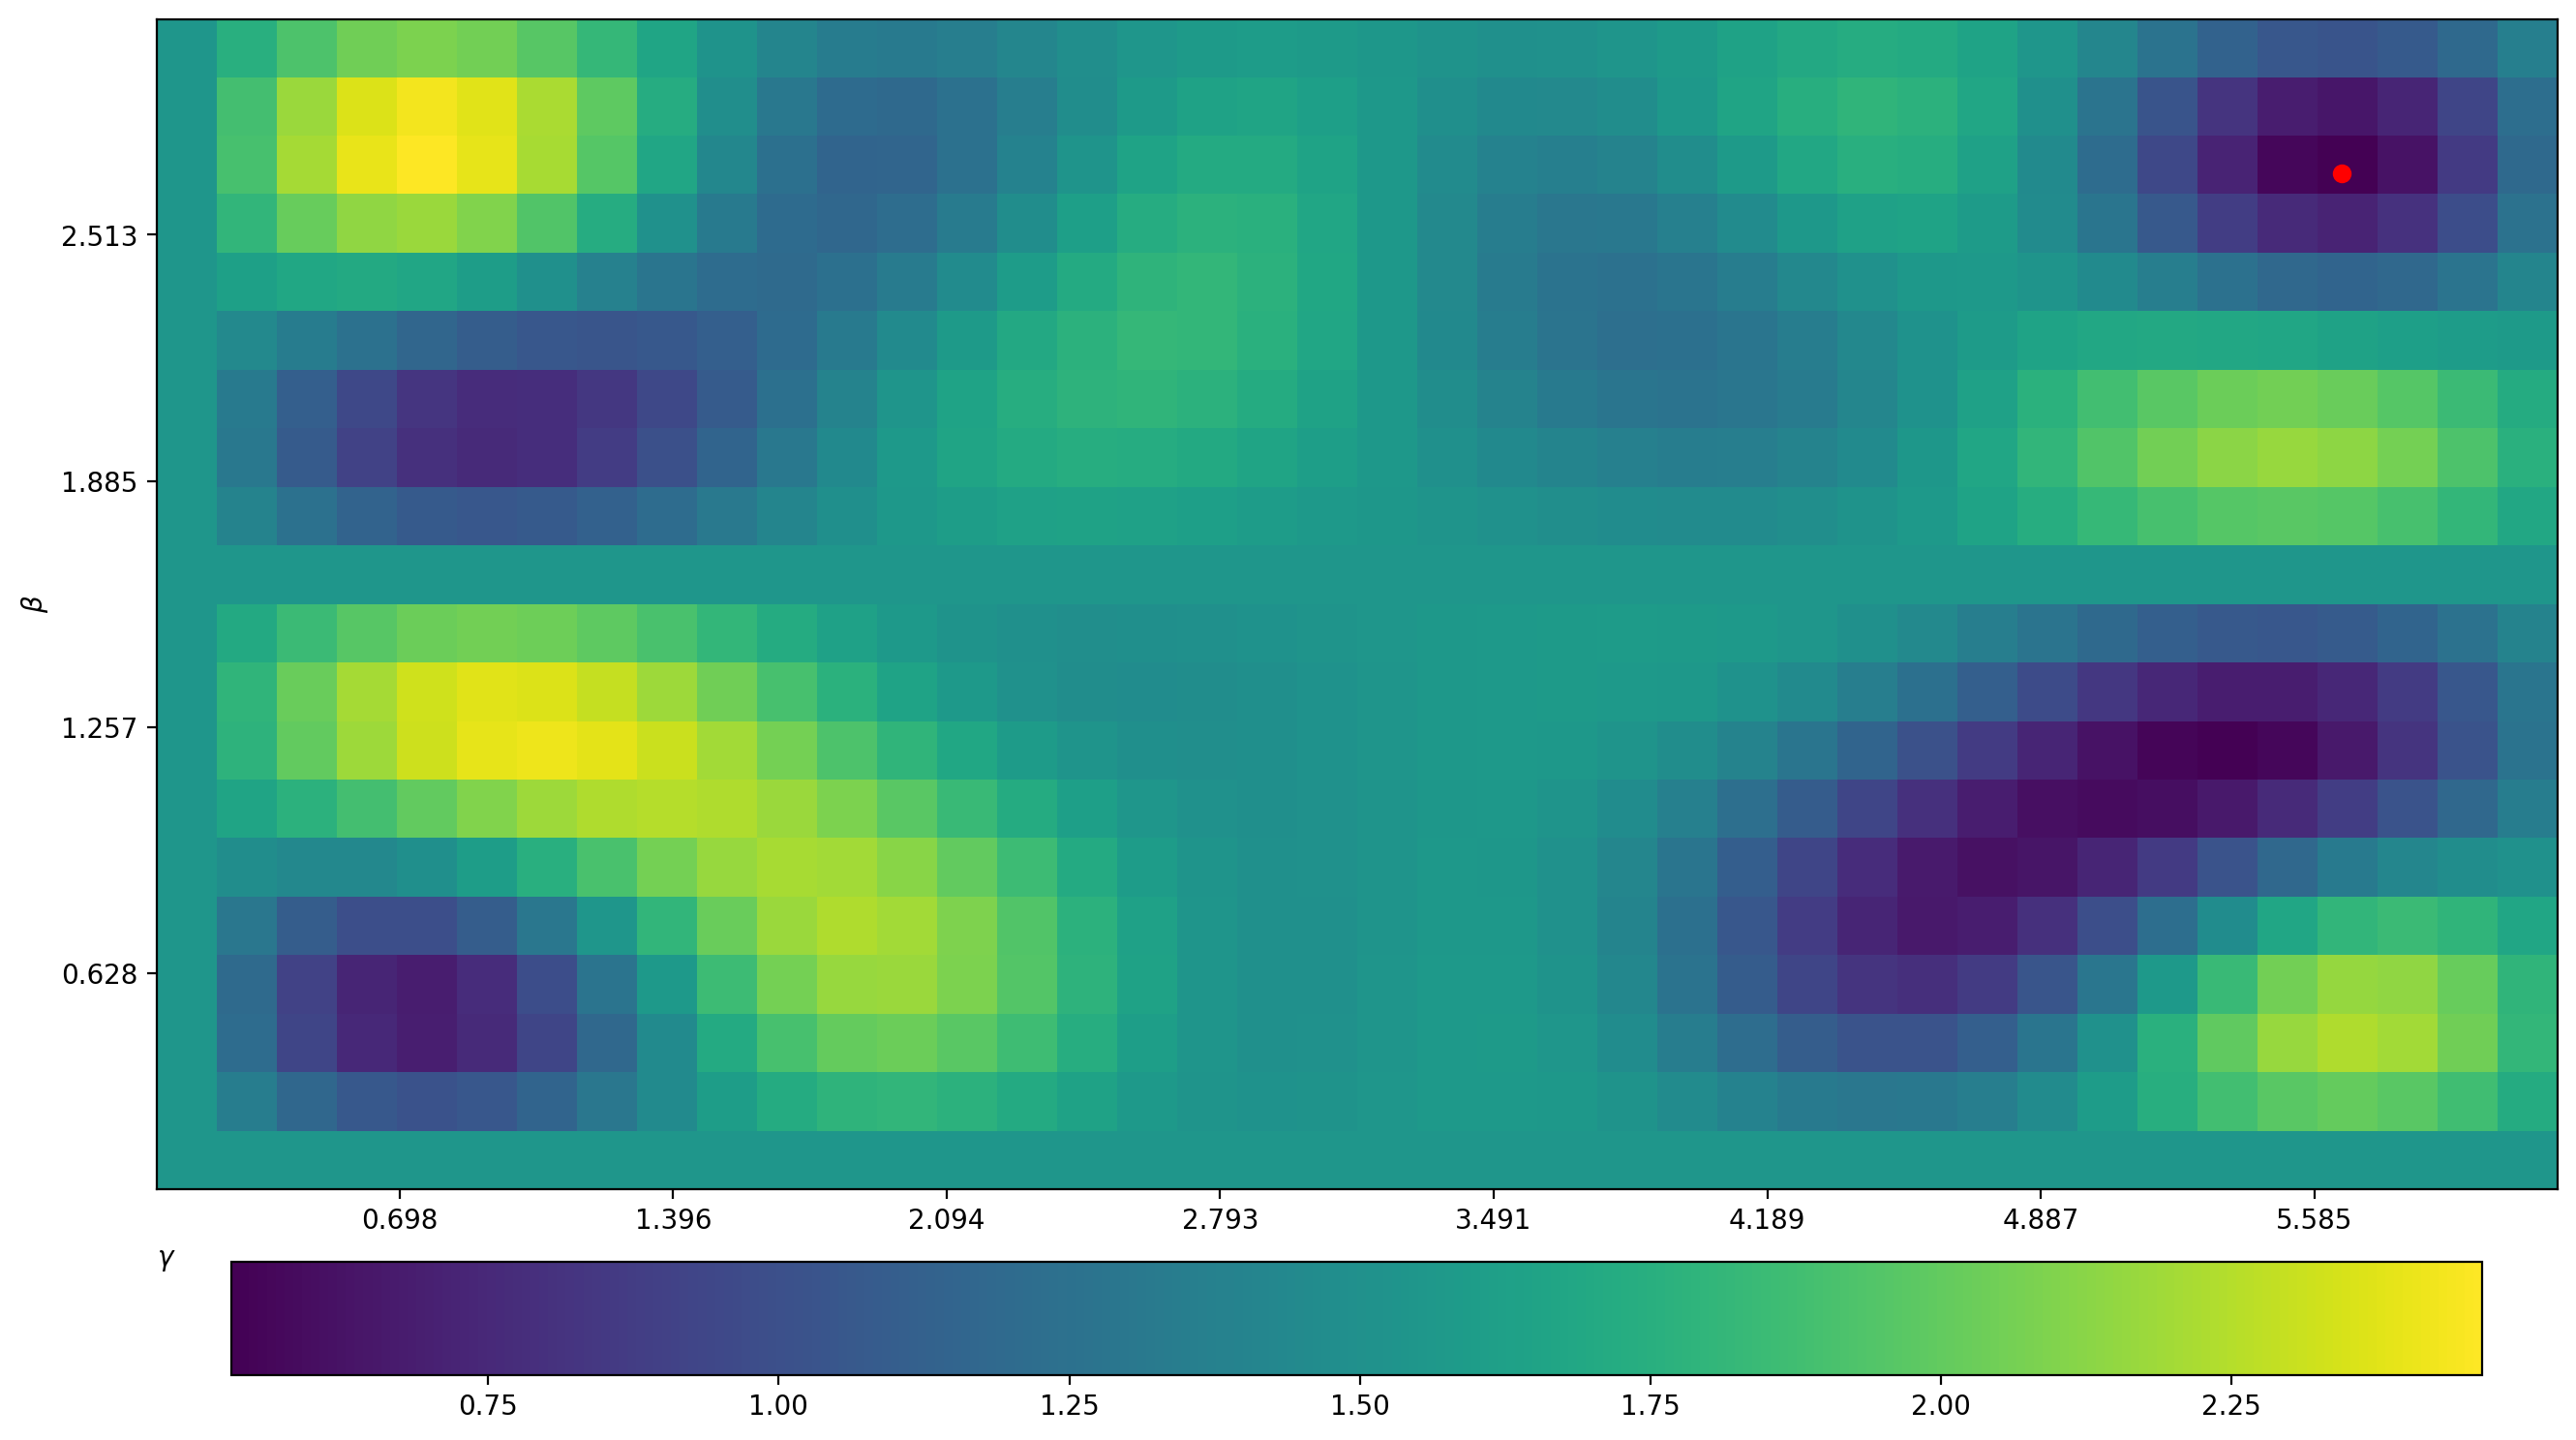

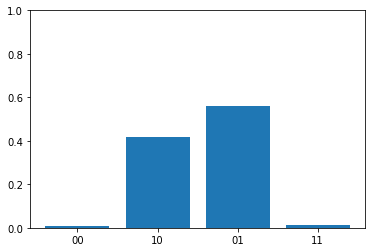

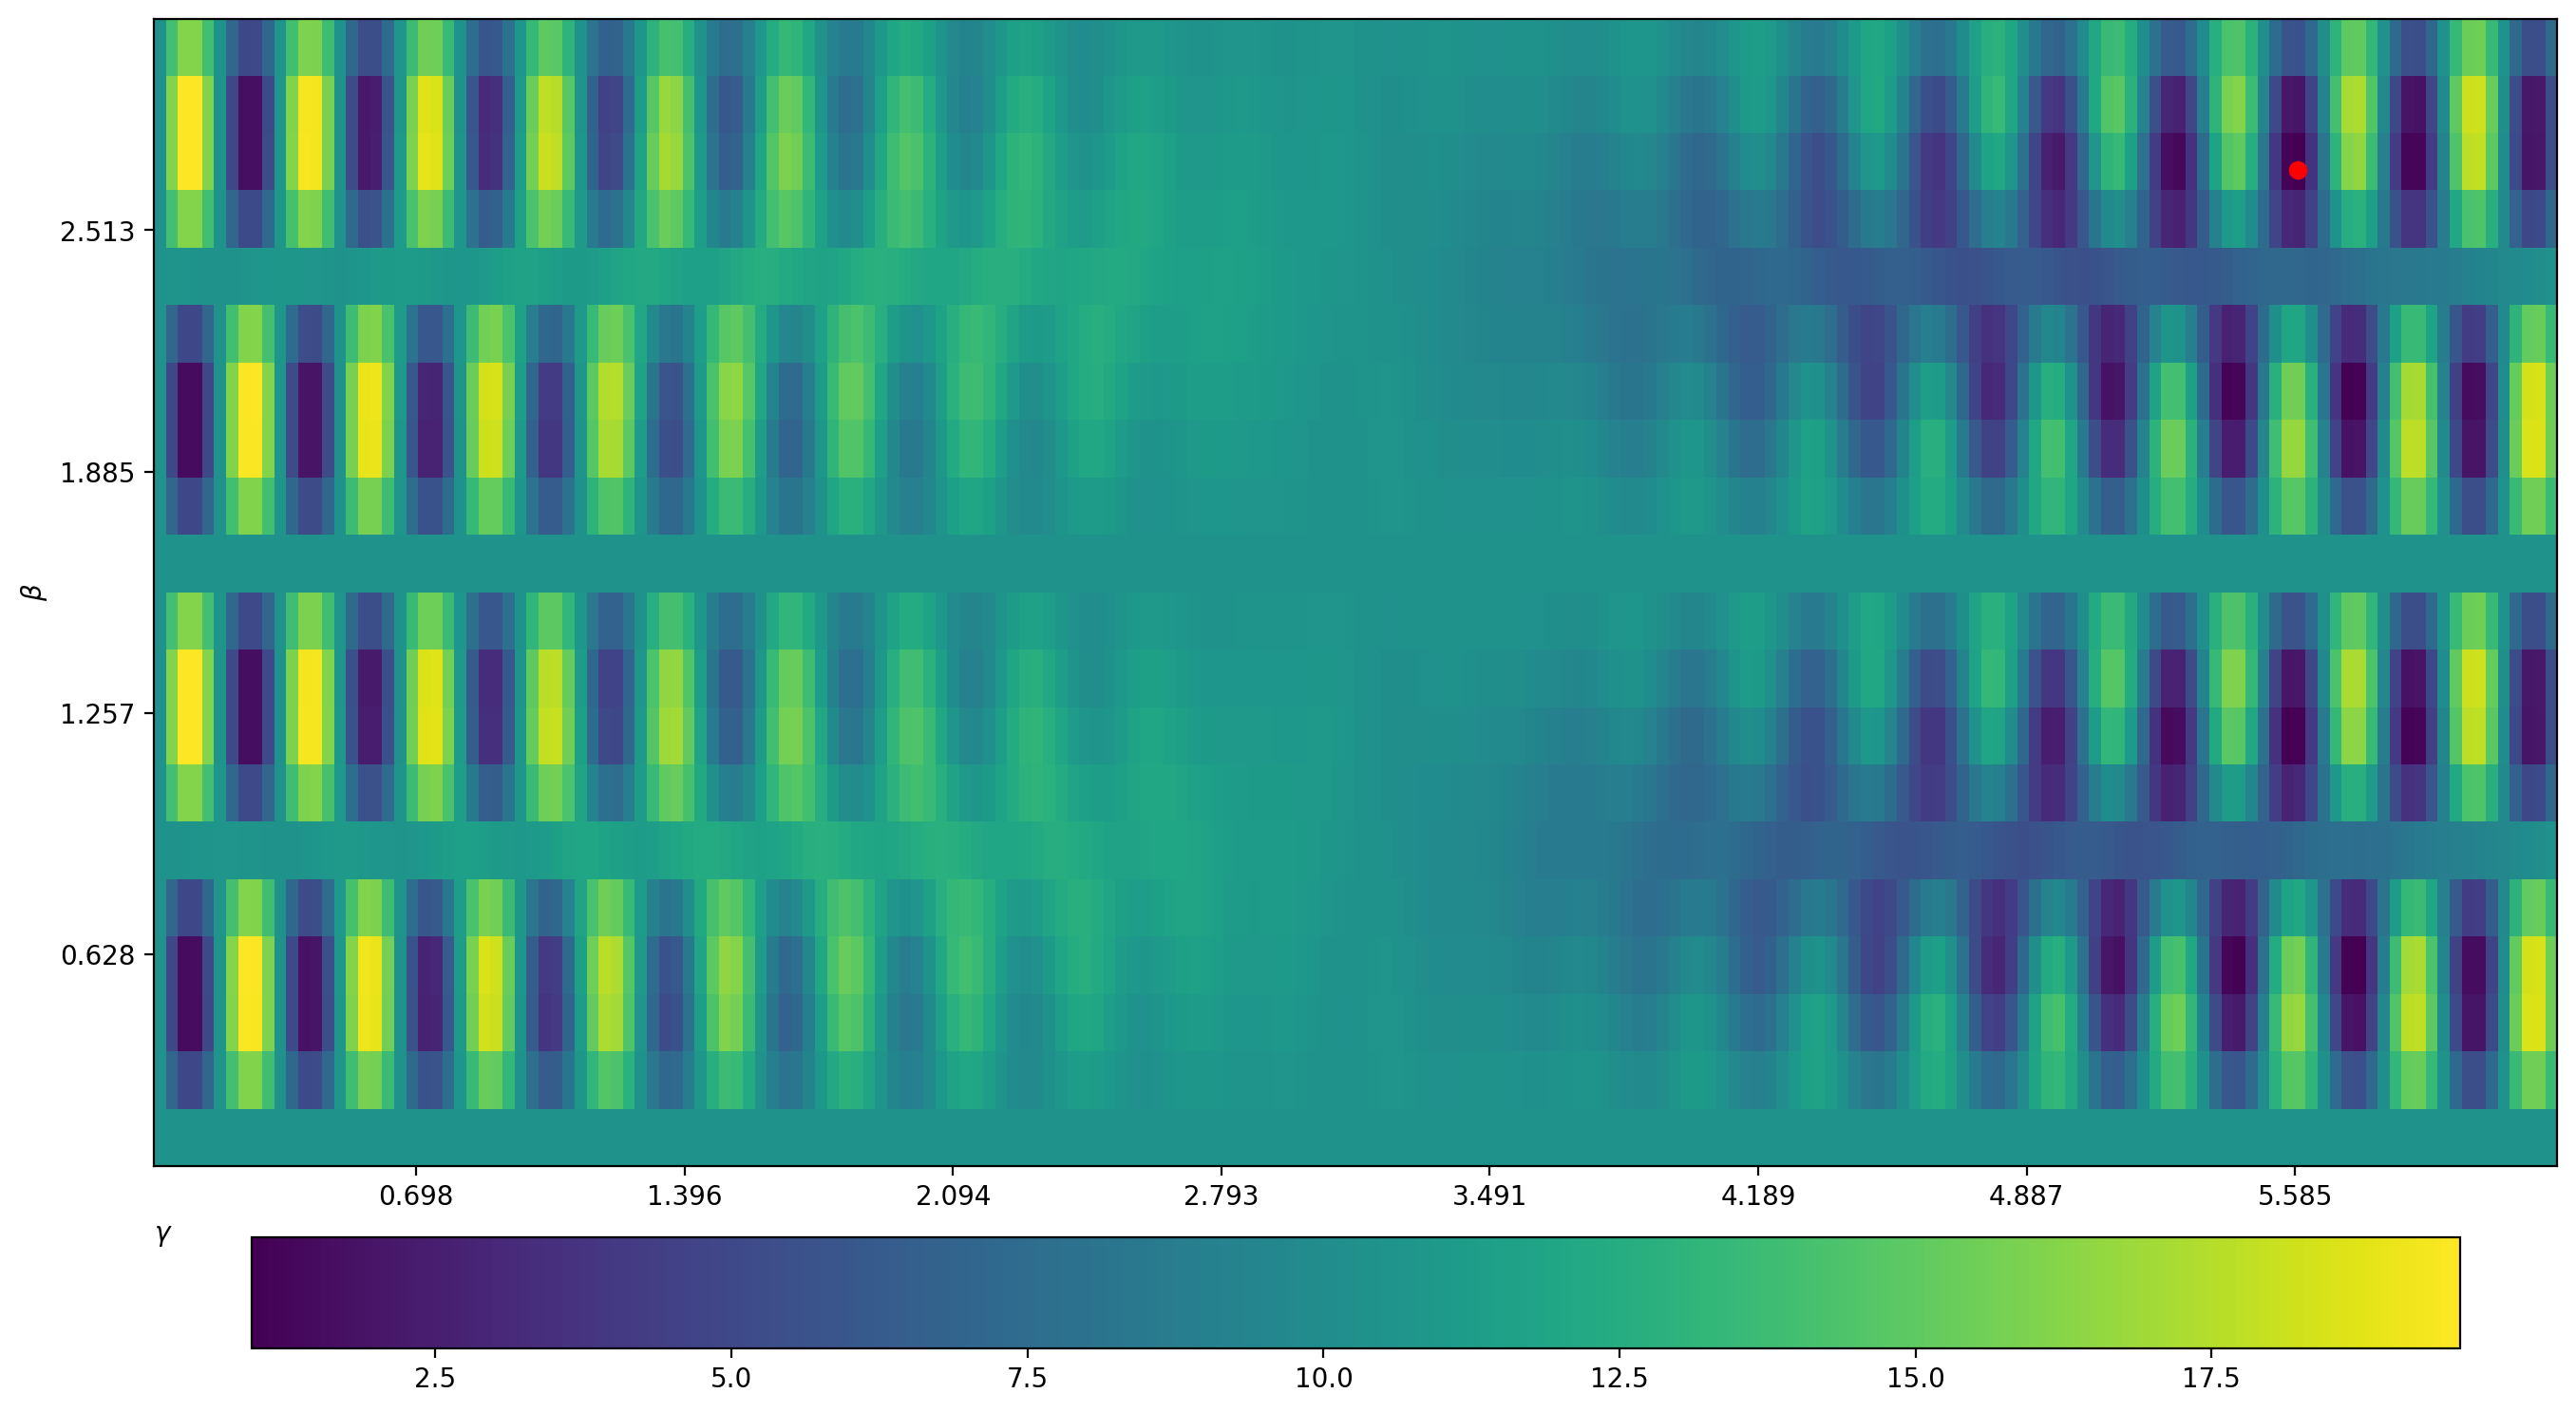

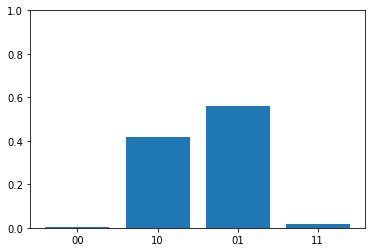

In [78]:
qaoa=QAOASwe(CR, FR)

for mu in [0.1,0.2,1,10]:
    print("mu=",mu)
    if mu>1:
        m=40*5
    else:
        m=40
    E, x0, job, ji = qaoa.getElandscape(backend,mu,ng=m)

    # plot landscape
    _=getfig(E,ng=m)
    pl.plot(x0[0],x0[1],'ro')
    
    # plot histogram
    md=job.result().get_counts()[int(ji)]
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])

mu= 0.1 useExco= True
mu= 0.2 useExco= True
mu= 1 useExco= True
mu= 10 useExco= True
mu= 0.1 useExco= False
mu= 0.2 useExco= False
mu= 1 useExco= False
mu= 10 useExco= False


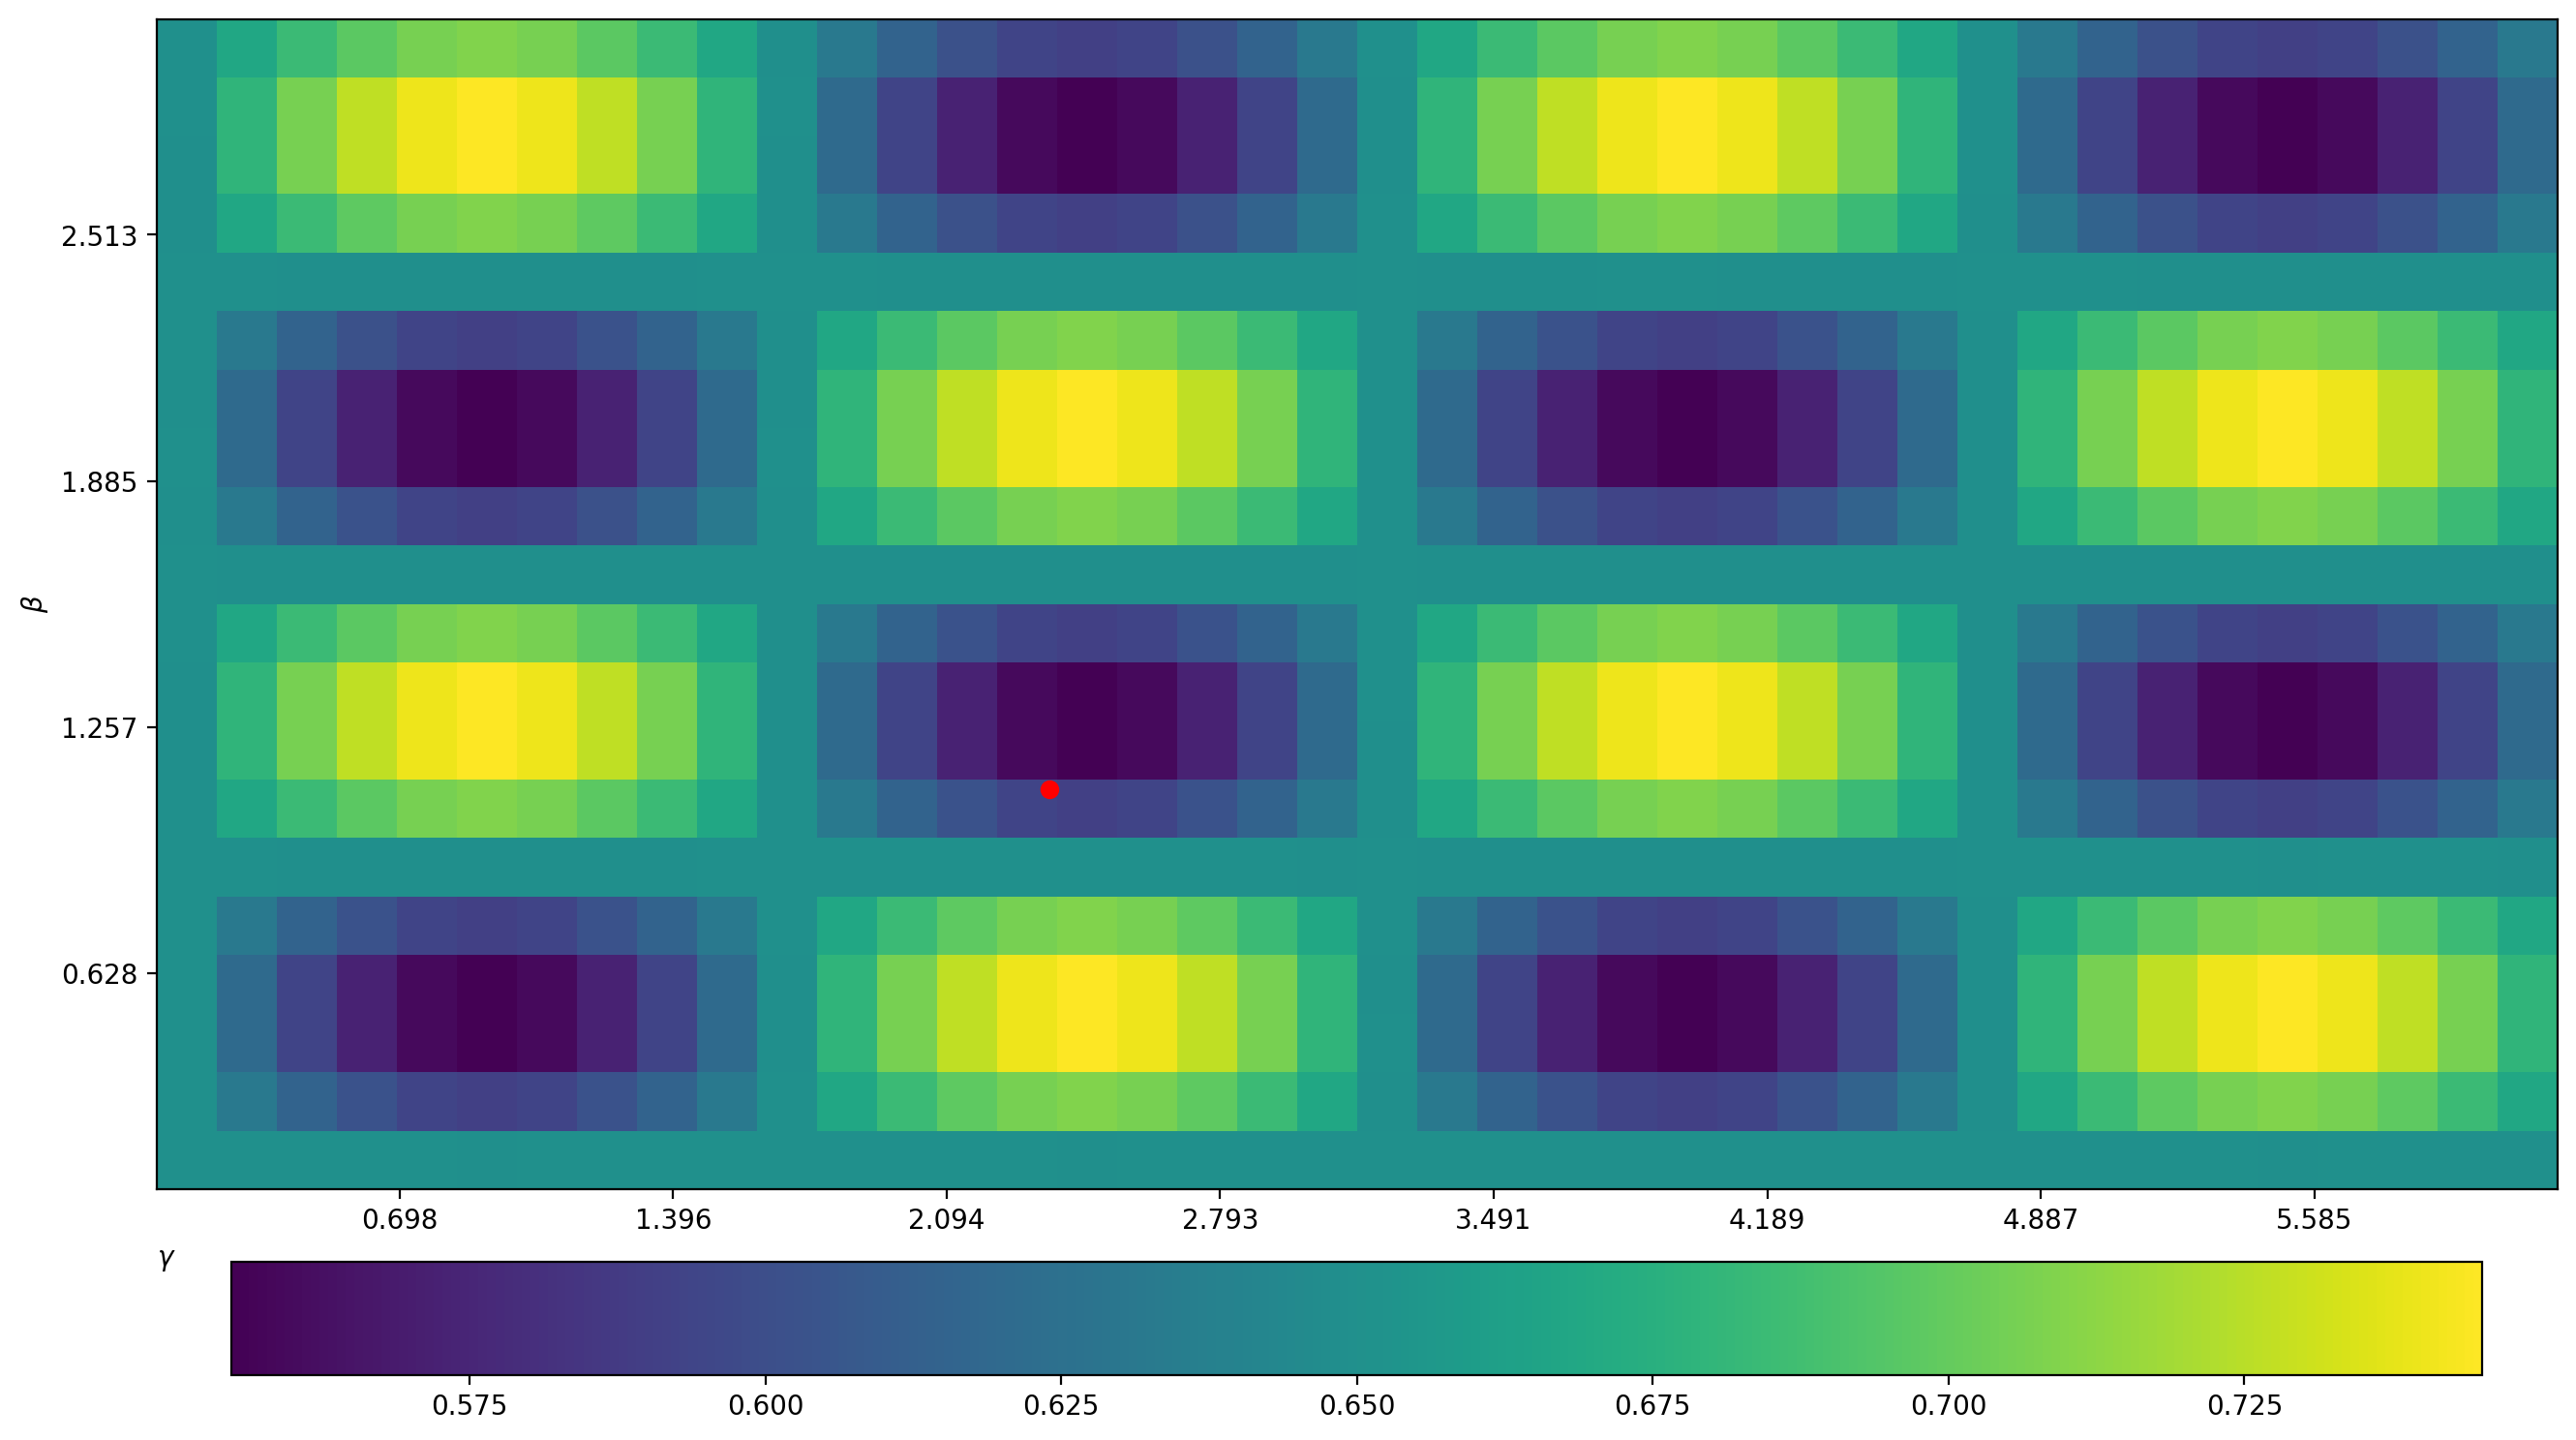

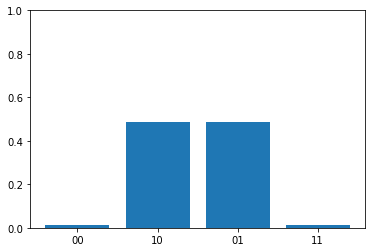

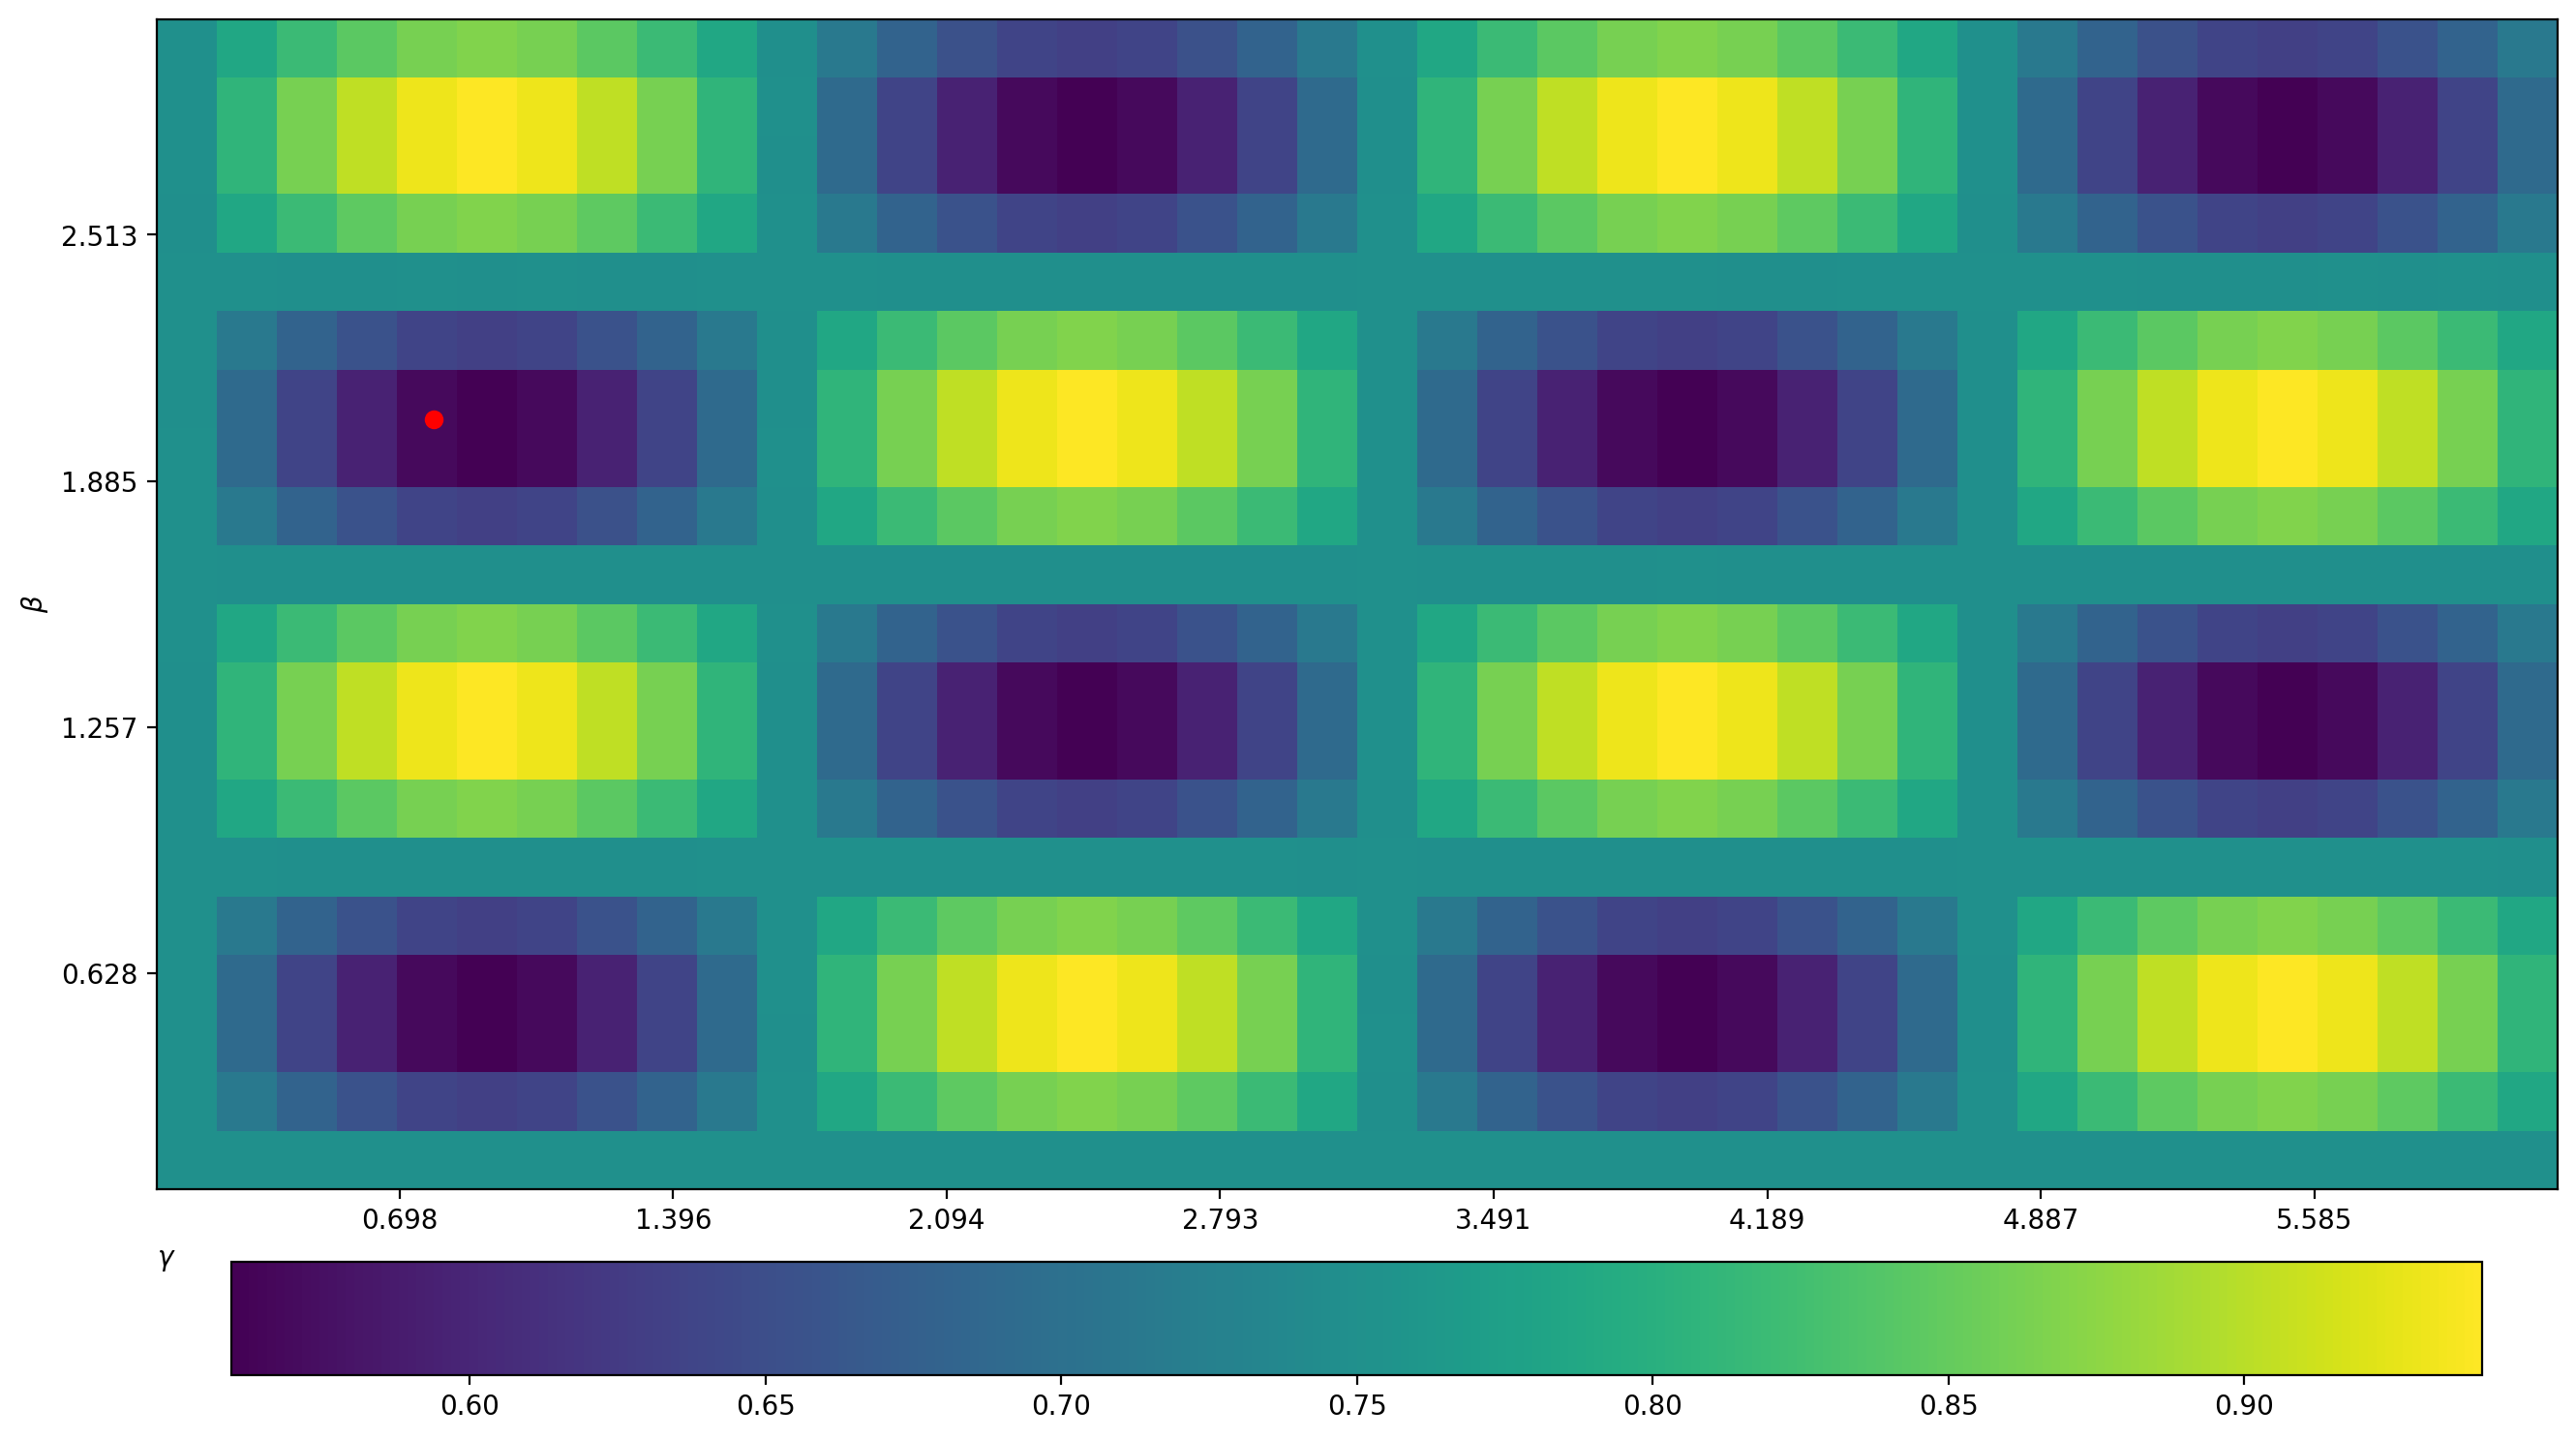

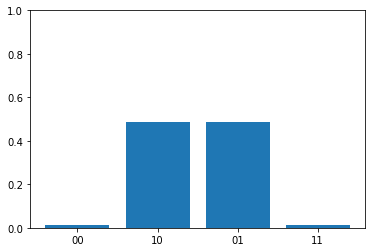

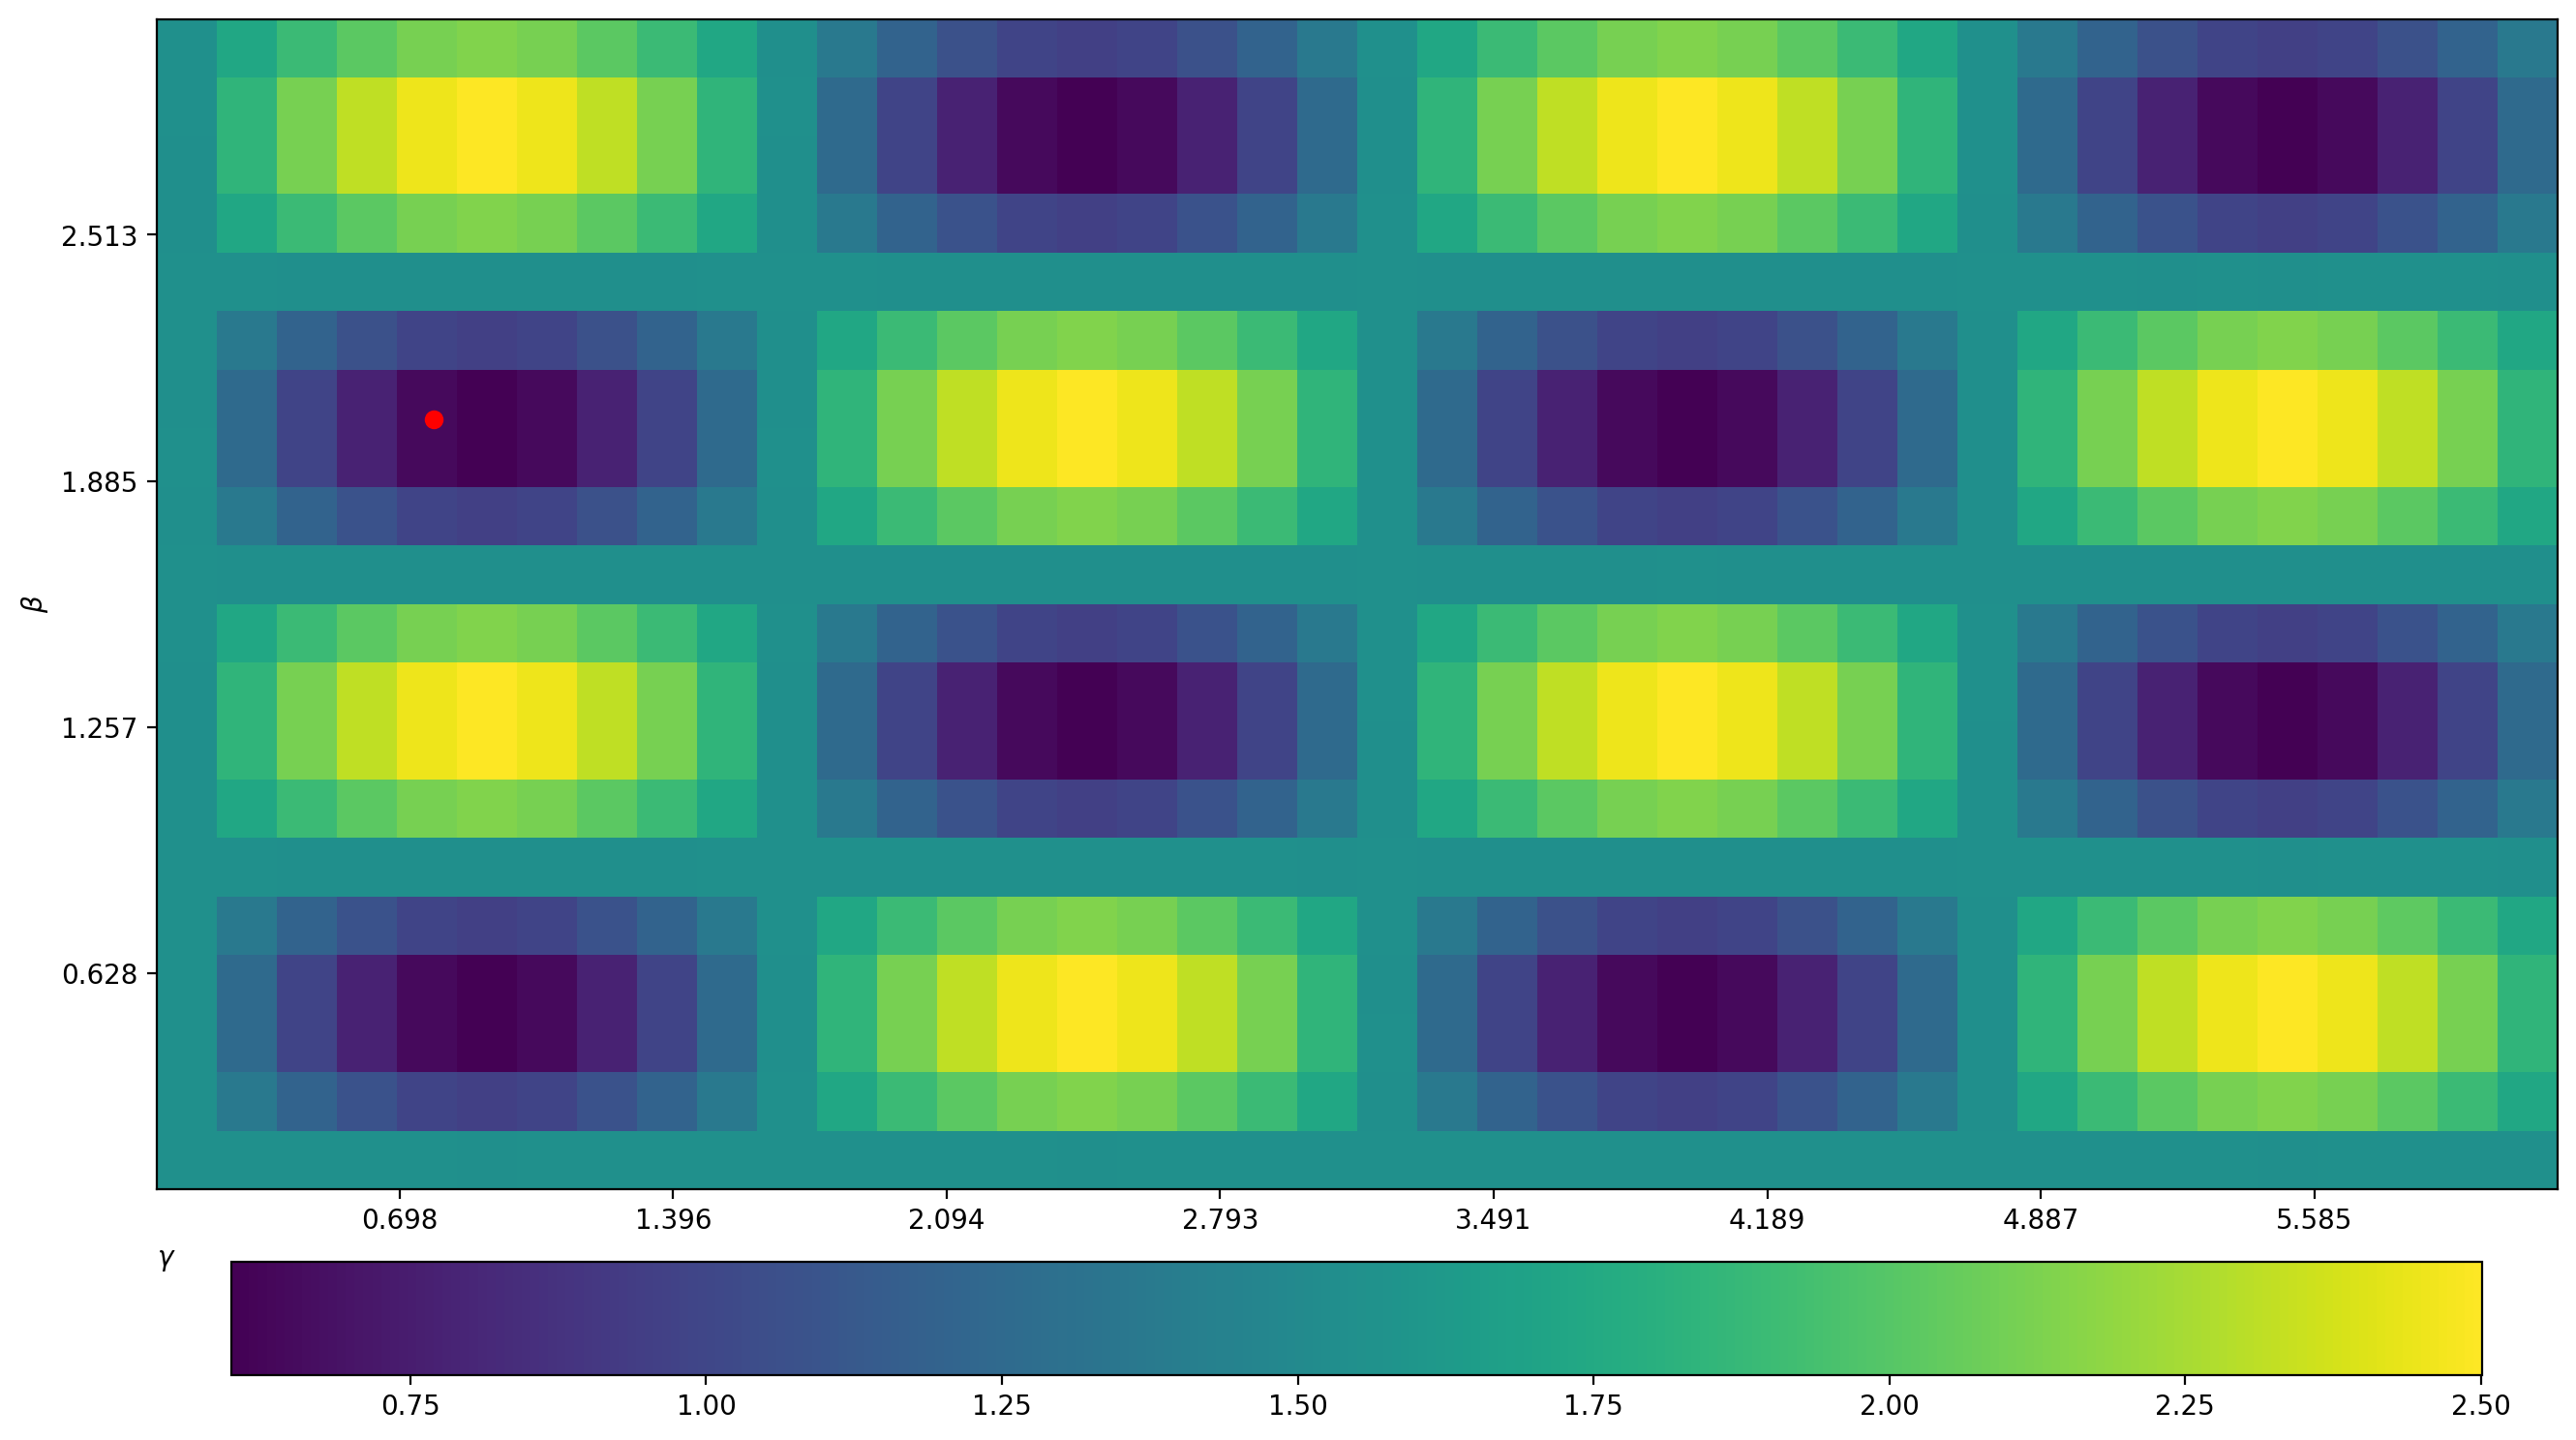

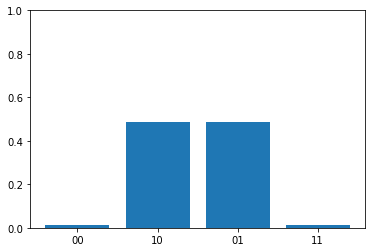

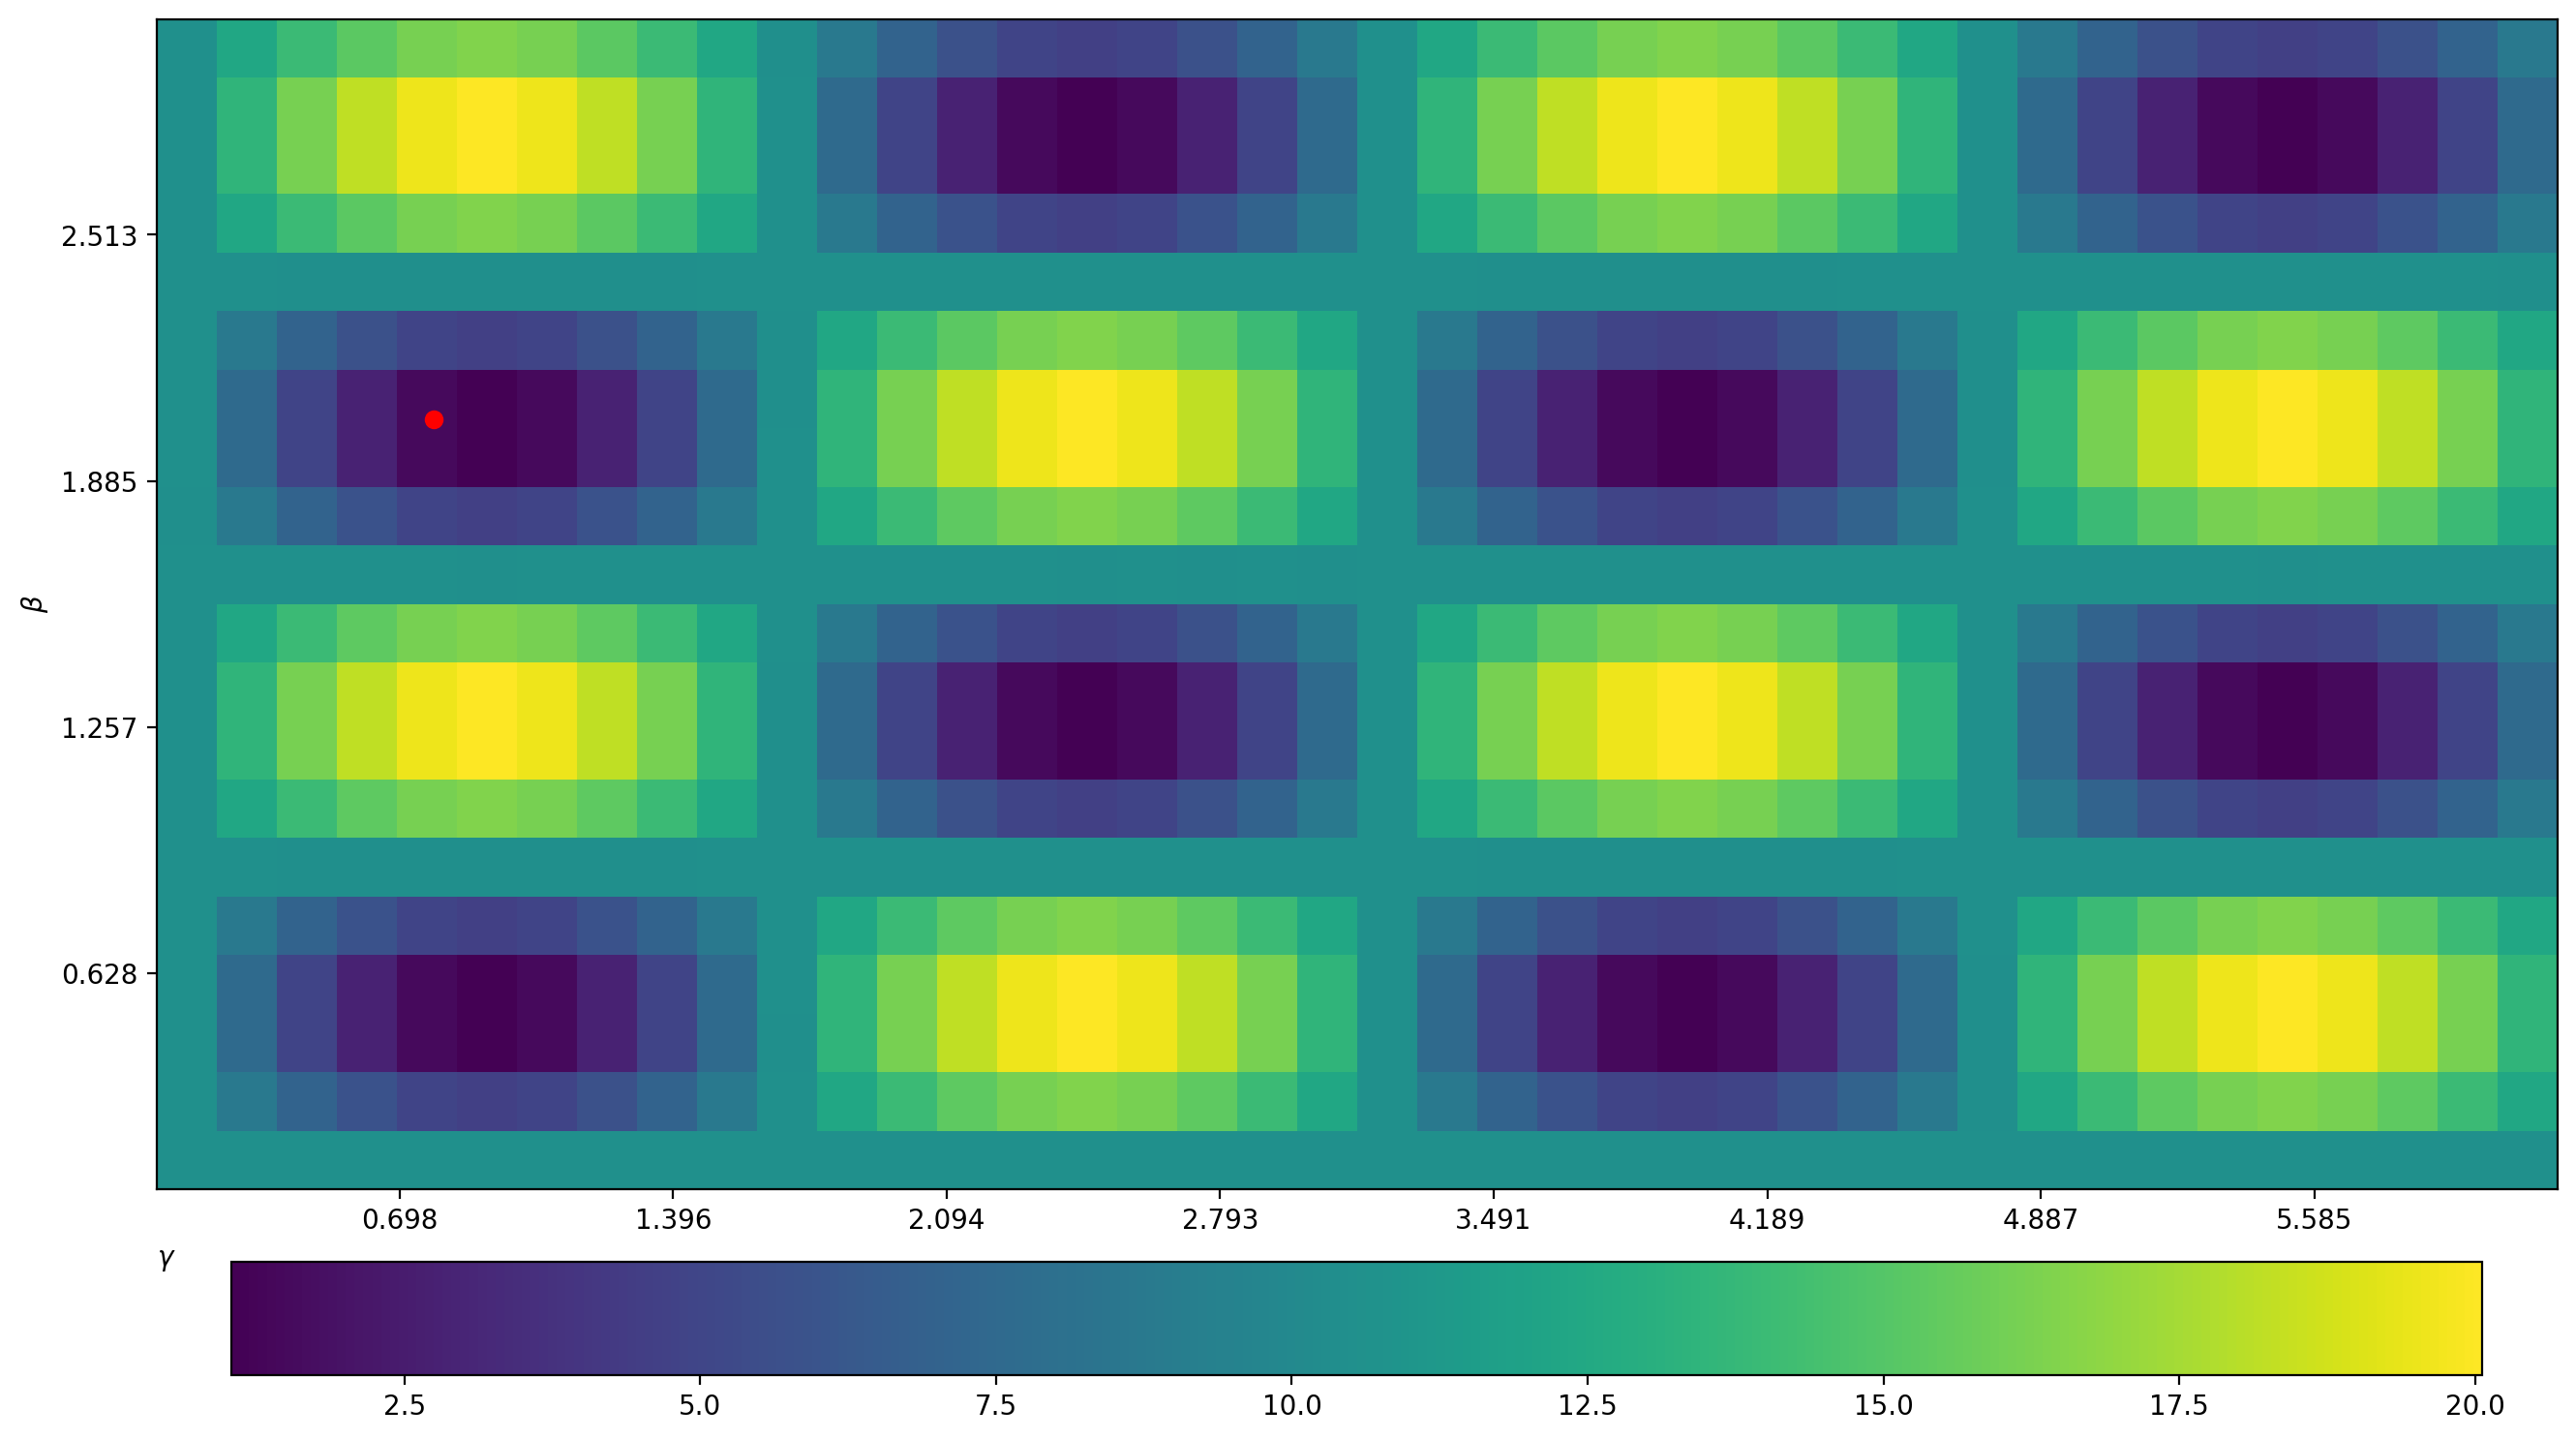

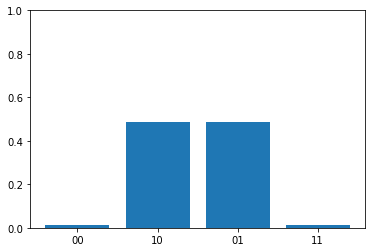

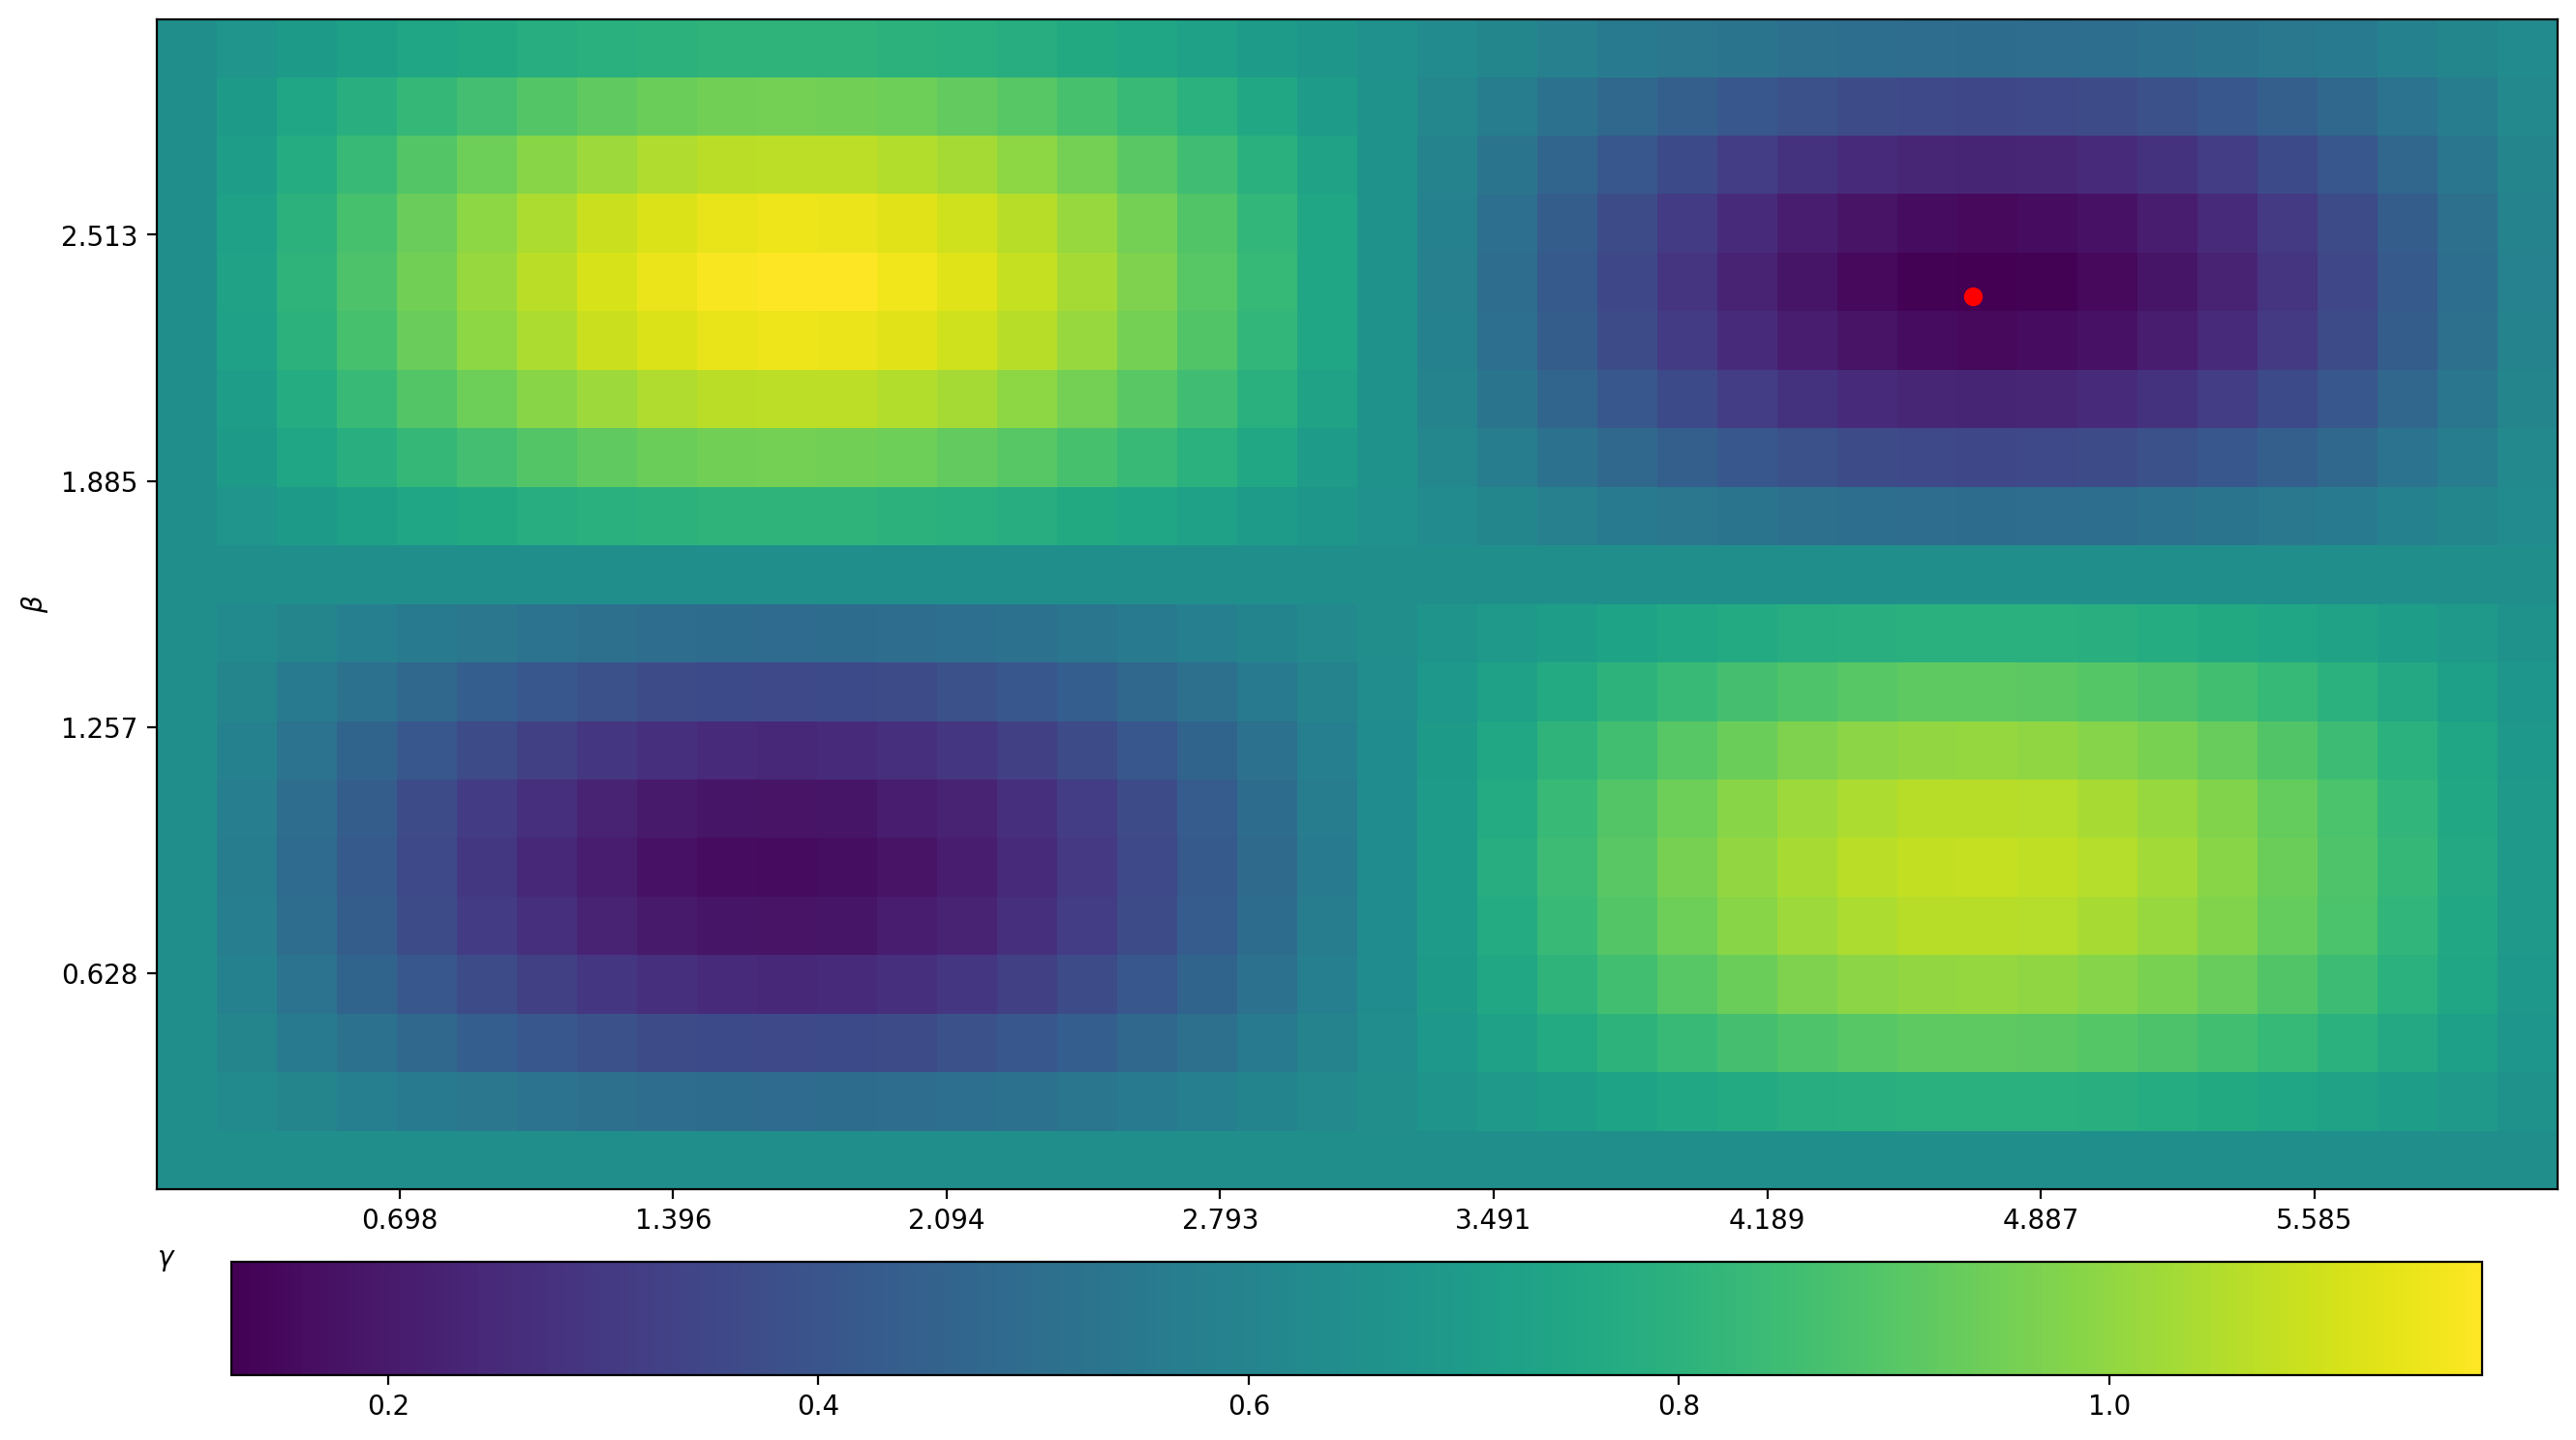

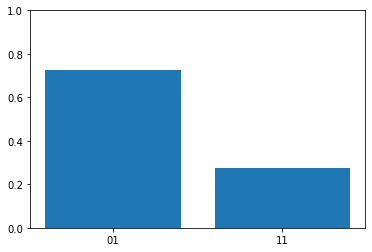

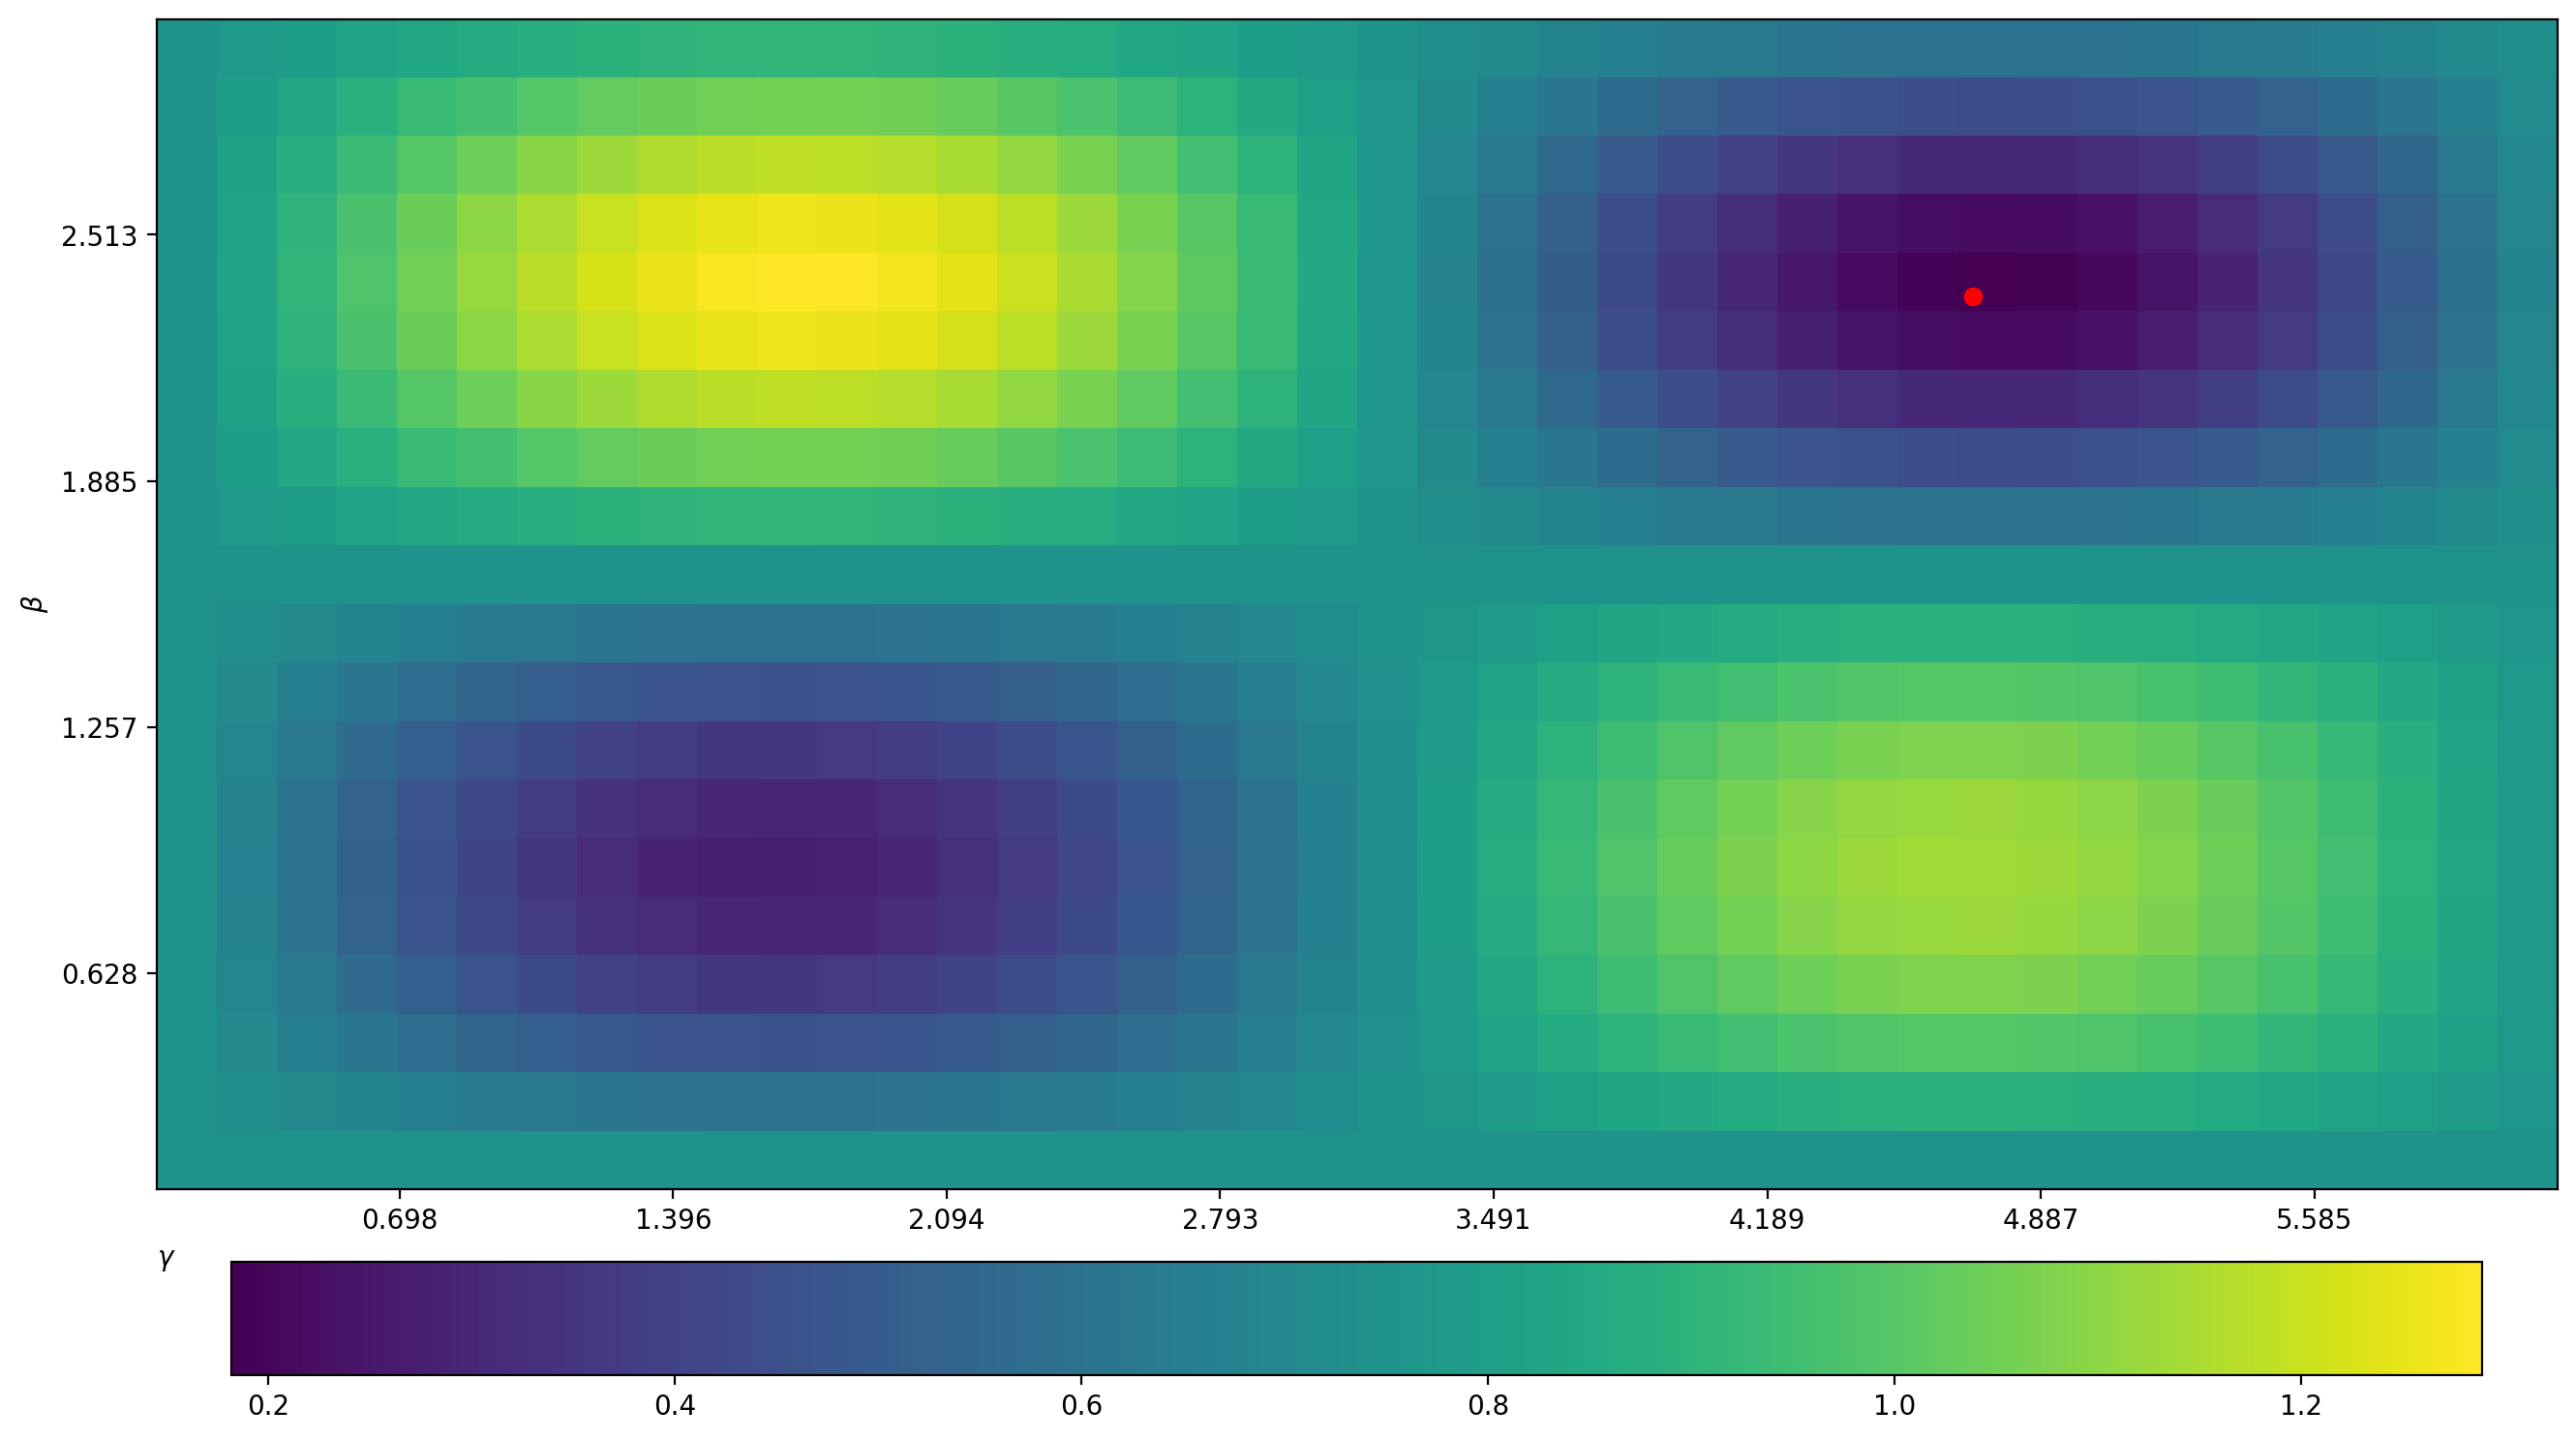

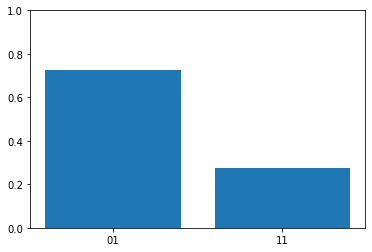

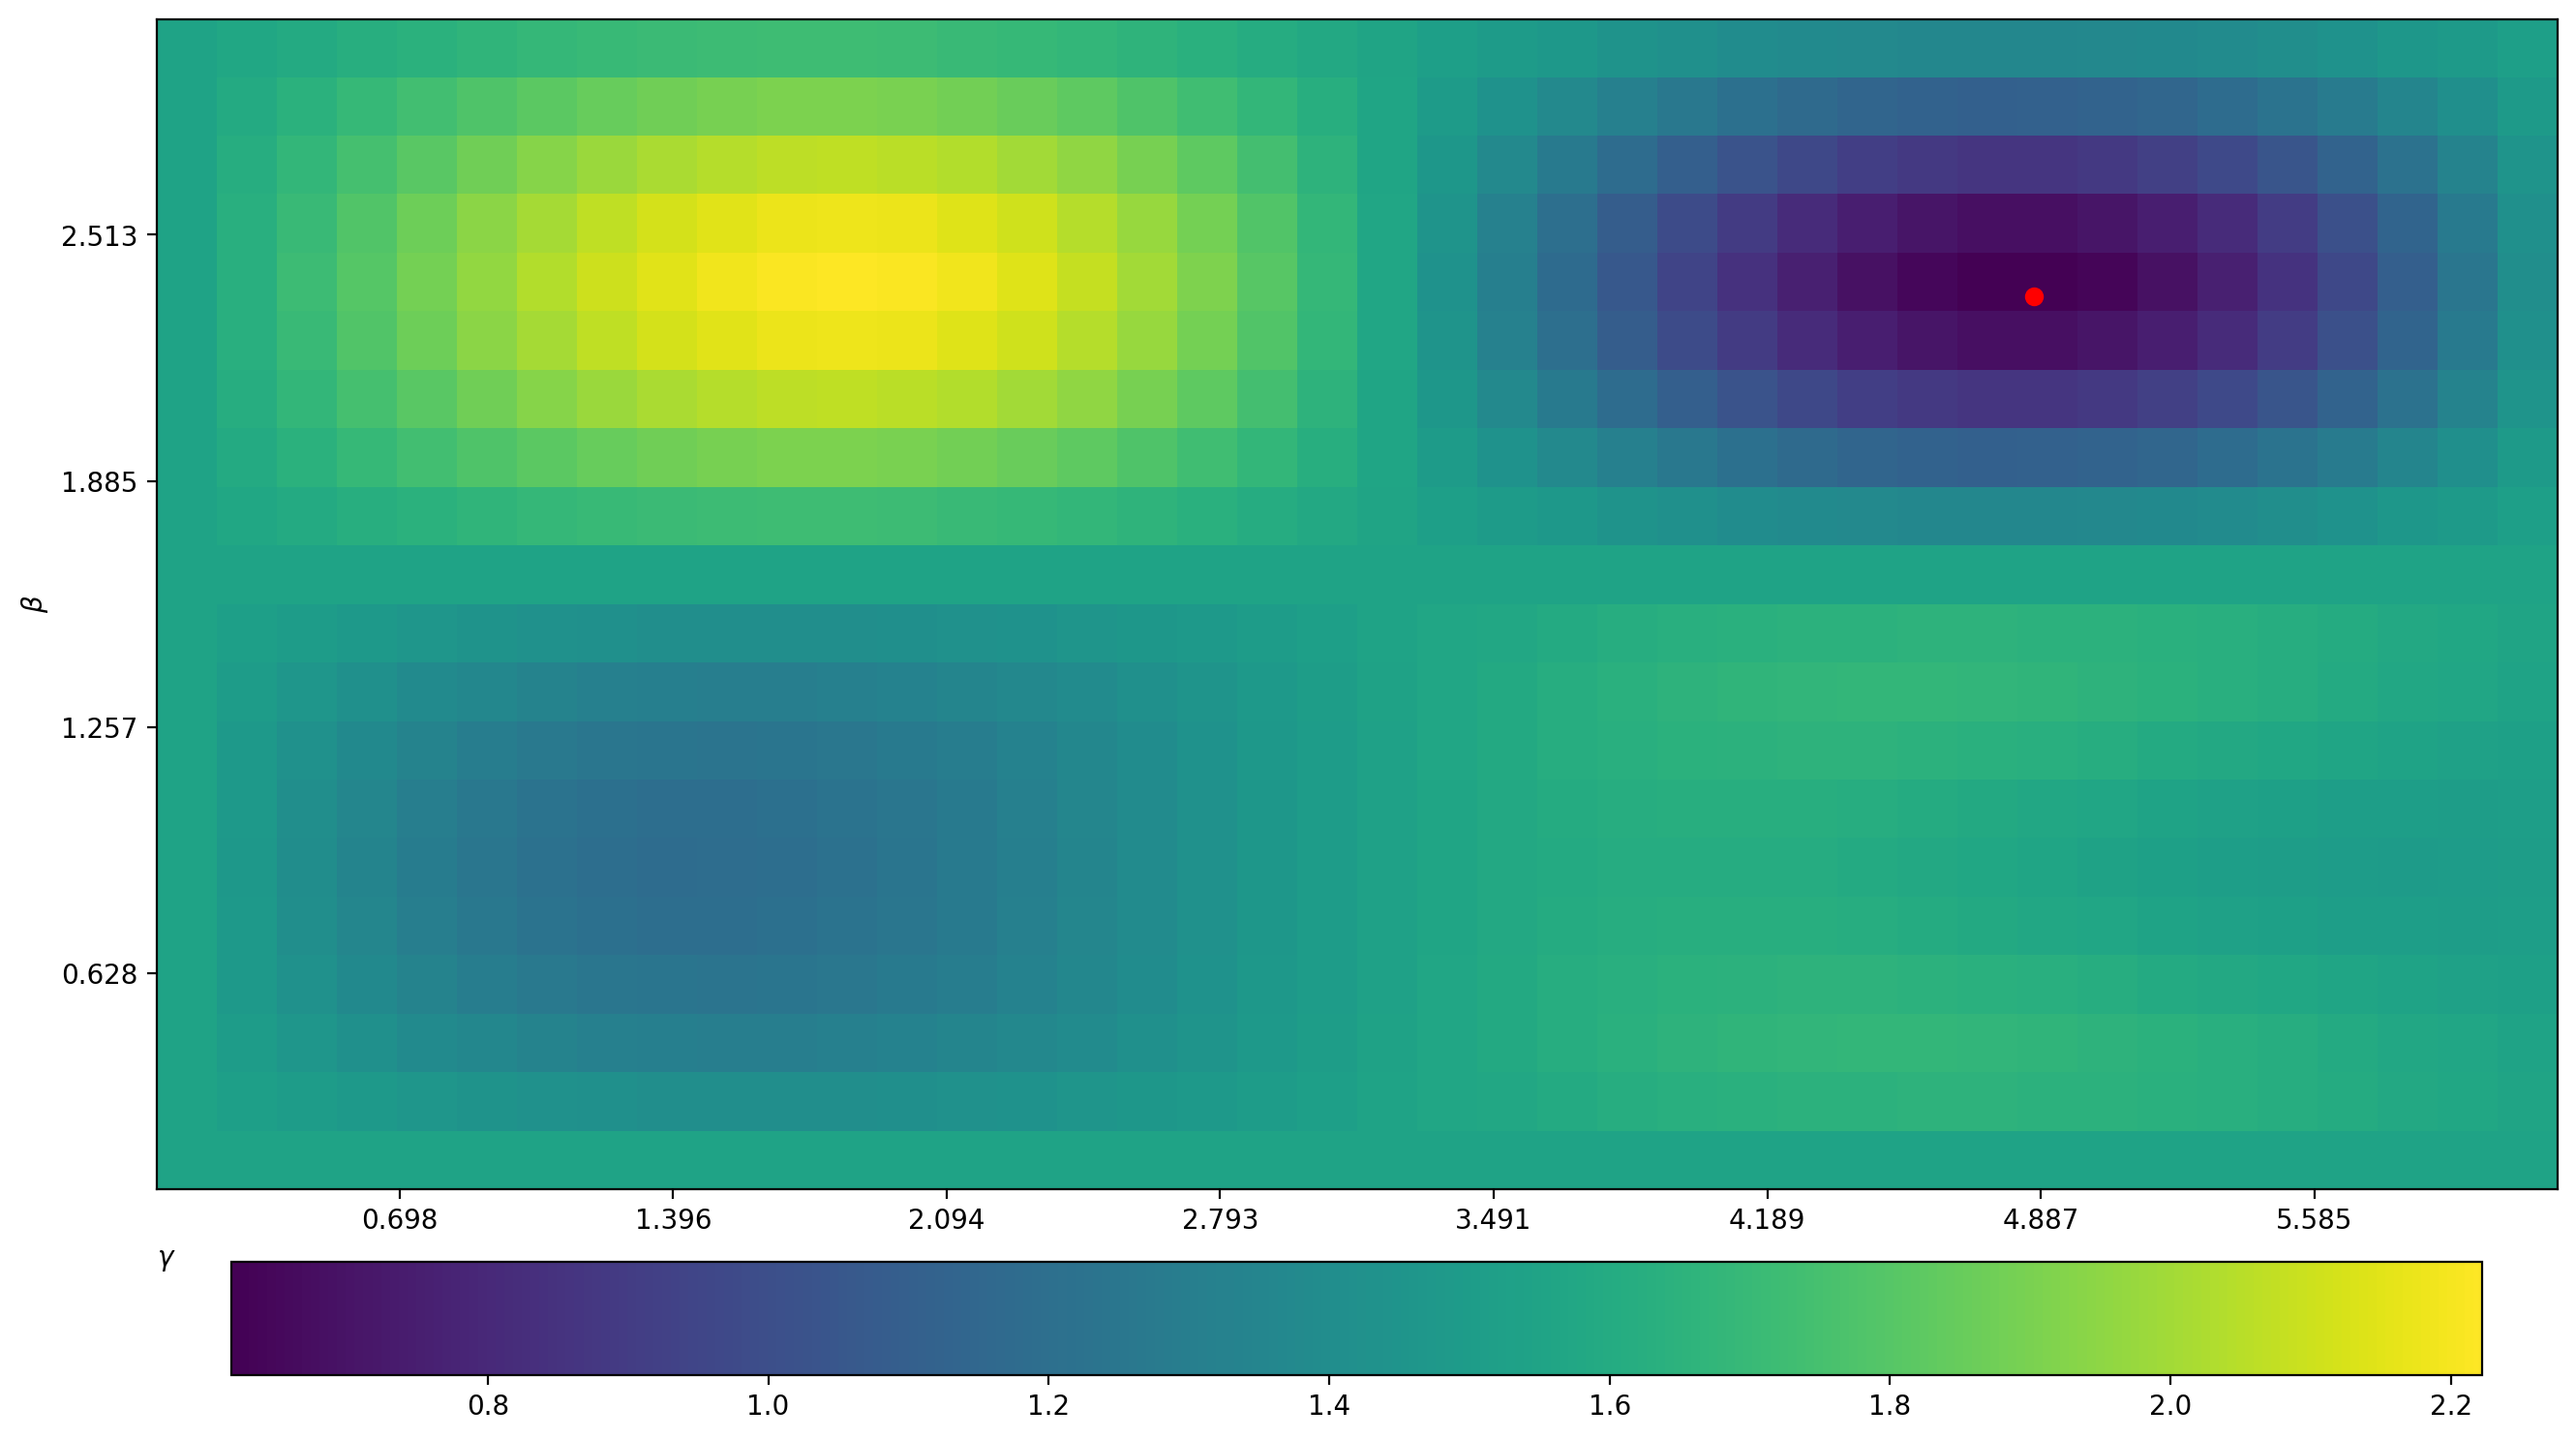

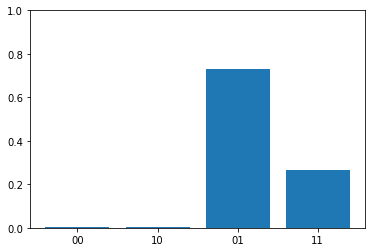

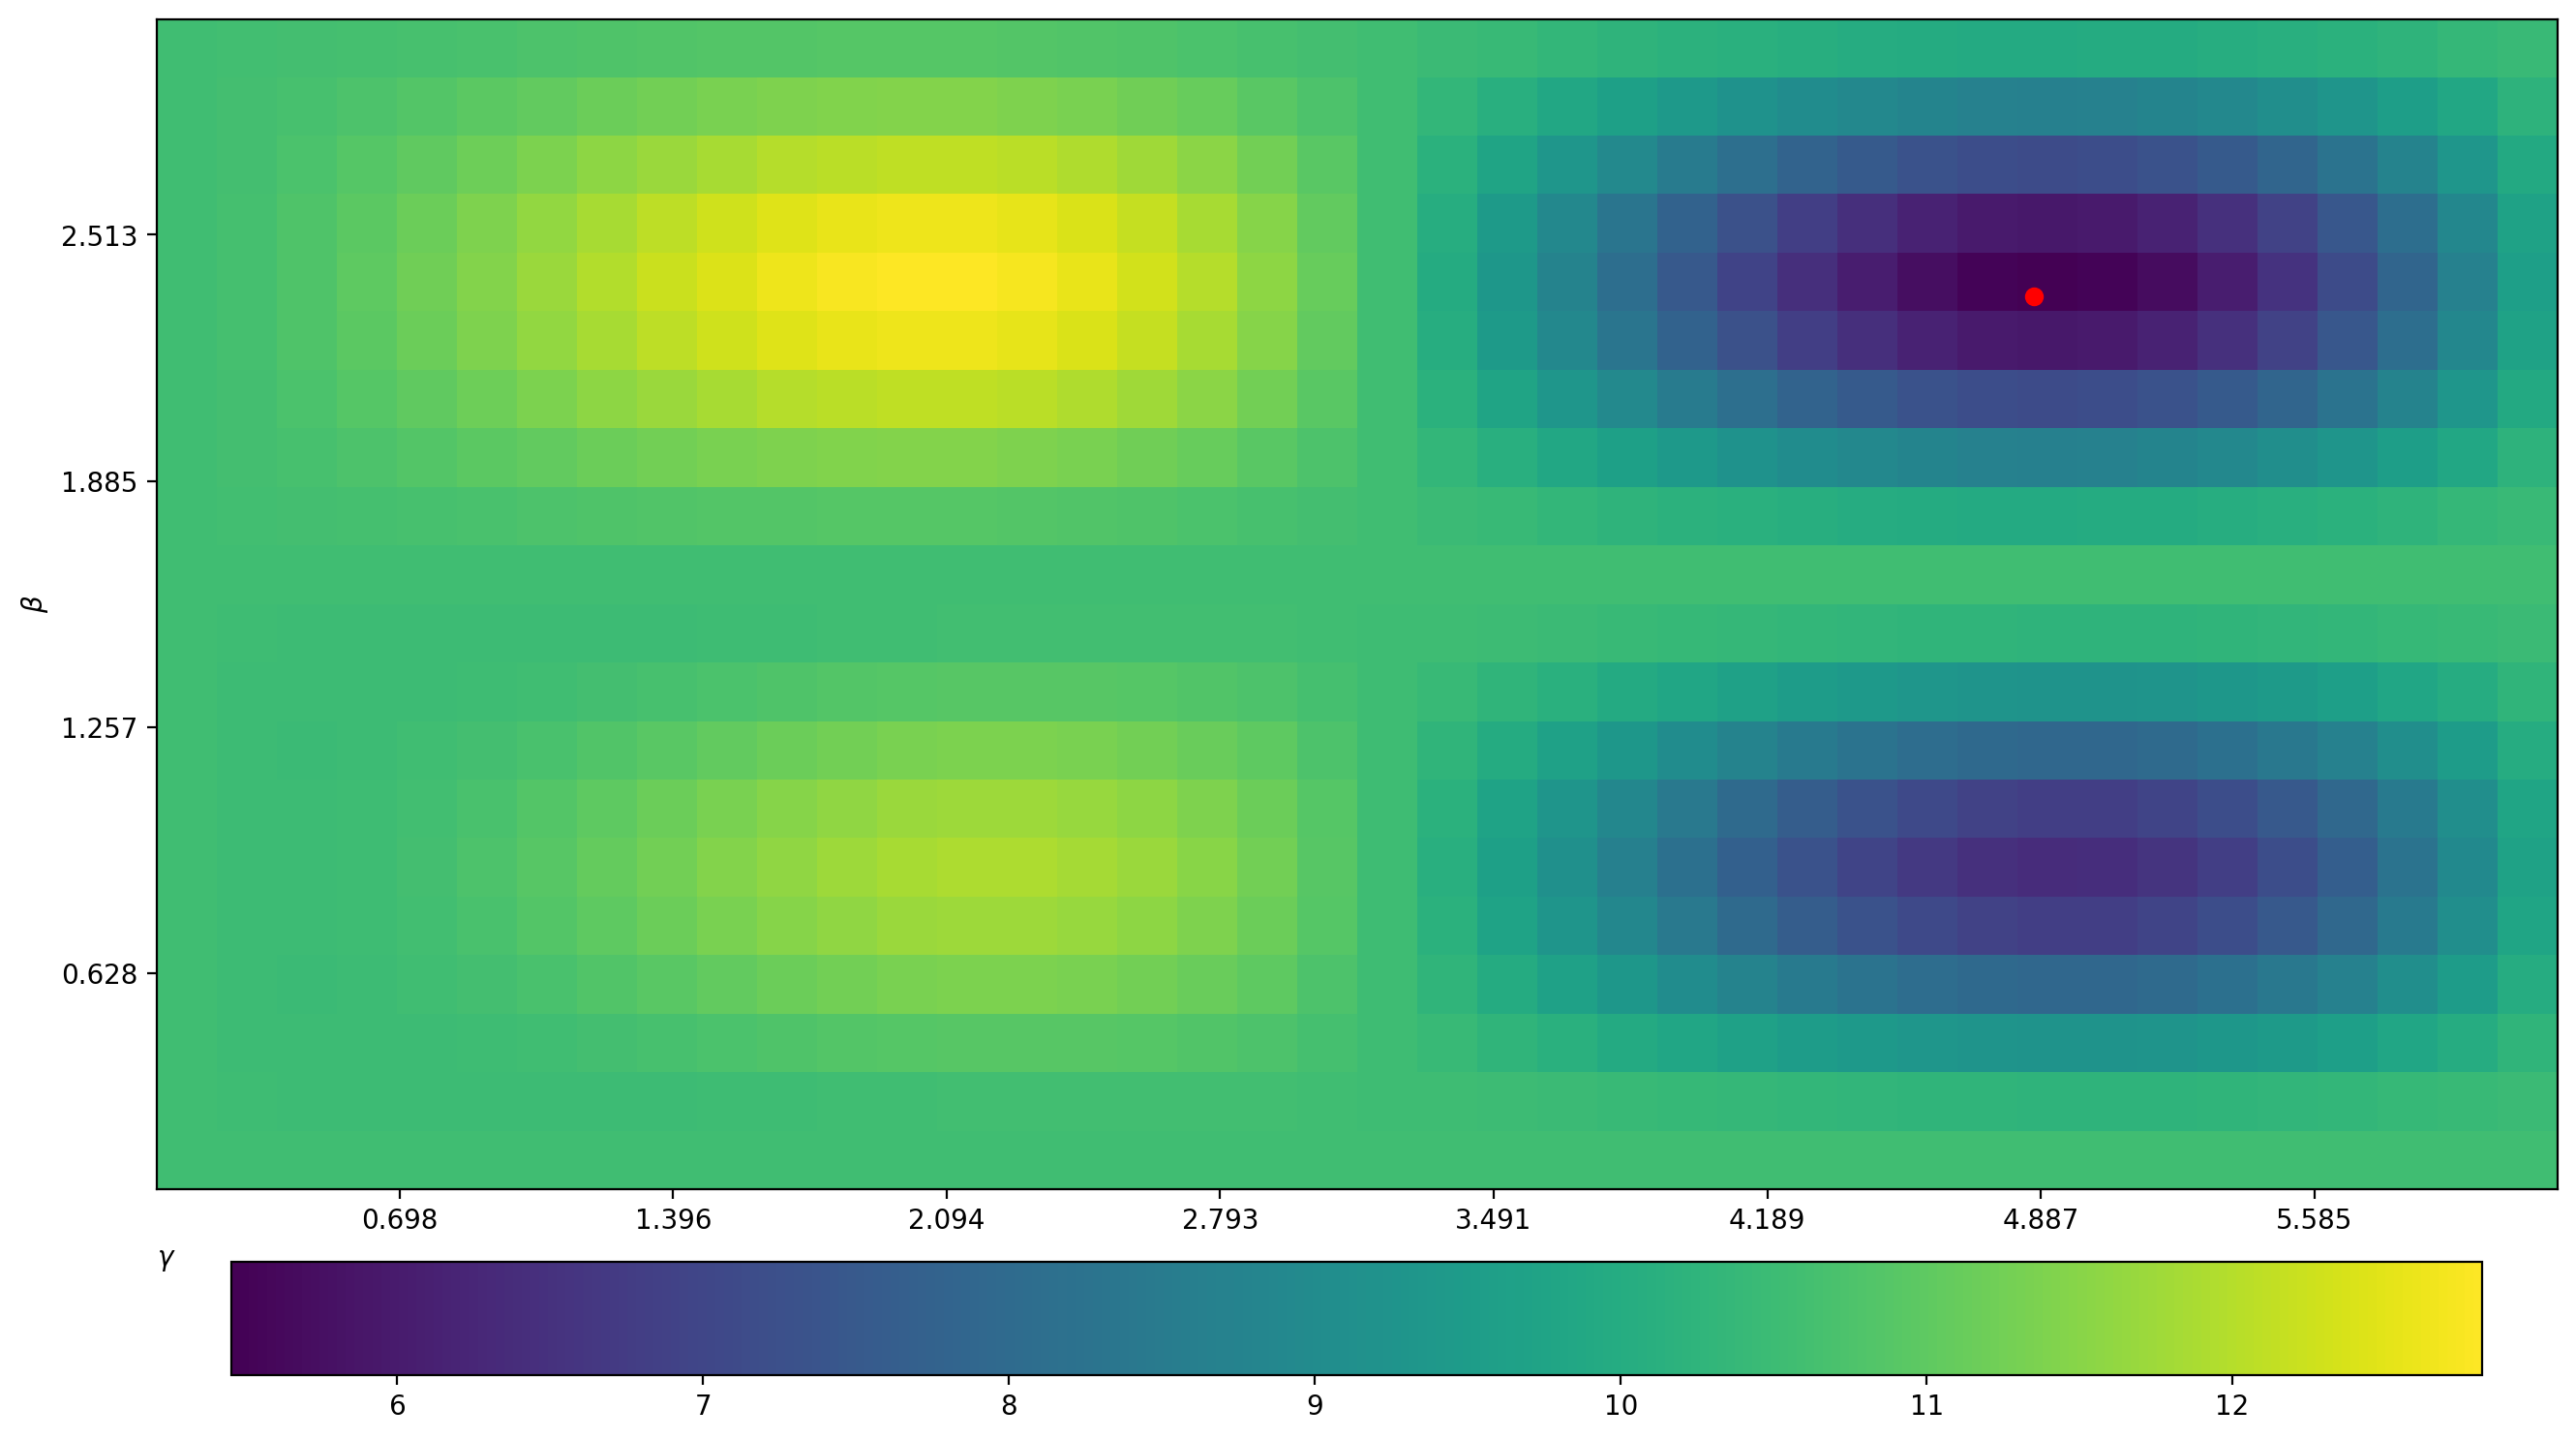

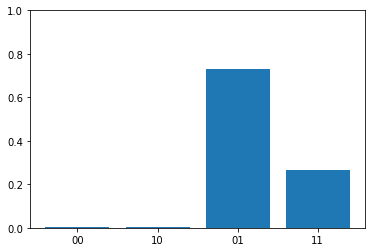

In [79]:
qaoa=QAOAChoose(CR, FR)

for ue in [True, False]:
    for mu in [0.1,0.2,1,10]:
        print("mu=",mu,"useExco=",ue)
        E, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[ue])

        # plot landscape
        _=getfig(E)
        pl.plot(x0[0],x0[1],'ro')

        # plot histogram
        md=job.result().get_counts()[int(ji)]
        pl.figure()
        pl.bar([k[::-1] for k in md.keys()], md.values())
        pl.ylim([0,1])

mu= 0.1
mu= 0.2
mu= 1
mu= 10


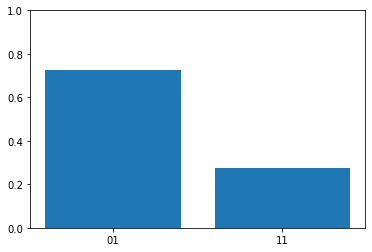

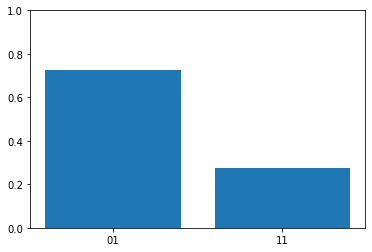

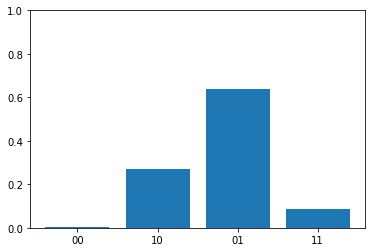

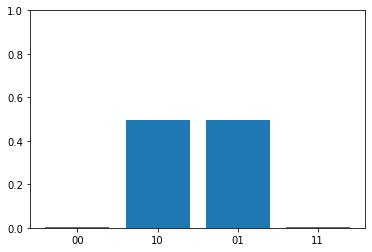

In [75]:
qaoa=QAOANor(CR, FR)

for mu in [0.1,0.2,1,10]:
    print("mu=",mu)
    E, x0, job, ji = qaoa.getElandscape(backend,mu)

    # plot histogram
    md=job.result().get_counts()[int(ji)]
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])

In [ ]:
# job.result().get_counts(),
job.result().results[int(ji)].data.statevector